In [1]:
from preprocessing_last20 import *
import torch.optim as optim
from tqdm import tqdm
from mindiffusion.ddpm import DDPM
from mindiffusion.unet import NaiveUnet
device = torch.device('cuda:2')
train_data = train_data.to(device)

In [2]:
ddpm = DDPM(eps_model=NaiveUnet(1, 1, n_feat=128), betas=(1e-4, 0.02), n_T=600)
ddpm.to(device)

DDPM(
  (eps_model): NaiveUnet(
    (init_conv): Conv3(
      (main): Sequential(
        (0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): GroupNorm(8, 128, eps=1e-05, affine=True)
        (2): ReLU()
      )
      (conv): Sequential(
        (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): GroupNorm(8, 128, eps=1e-05, affine=True)
        (2): ReLU()
        (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): GroupNorm(8, 128, eps=1e-05, affine=True)
        (5): ReLU()
      )
    )
    (down1): UnetDown(
      (model): Sequential(
        (0): Conv3(
          (main): Sequential(
            (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (1): GroupNorm(8, 128, eps=1e-05, affine=True)
            (2): ReLU()
          )
          (conv): Sequential(
            (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
         

In [10]:
train_data = train_data.reshape(200, 1, 1, 64, 64)

In [3]:
ddpm.load_state_dict(torch.load("ddpm_batched_600_last20.pth"))

<All keys matched successfully>

In [11]:
def train_1_ep_ddpm(num_epoch, optim):

    print(f"Epoch {num_epoch} : ")
    ddpm.train()

    loss_ema = None
    

    train_data_tmp = train_data[torch.randperm(train_data.size()[0])]
    train_data_tmp = train_data_tmp.reshape(50, 4, 1, 64, 64)
    
    for i in tqdm(range(train_data_tmp.shape[0])):
        optim.zero_grad()
        loss = ddpm(train_data_tmp[i])
        loss.backward()
        if loss_ema is None:
            loss_ema = loss.item()
        else:
            loss_ema = 0.9 * loss_ema + 0.1 * loss.item()
        optim.step()
    print('loss',loss_ema)
    if num_epoch%20 == 1:
        ddpm.eval()
        with torch.no_grad():
            xh = ddpm.sample(3, (1, 64, 64), device)
            print(xh.shape)
            tensor_to_picture(xh[0].detach().cpu().numpy()[0])
            tensor_to_picture(xh[1].detach().cpu().numpy()[0])
            tensor_to_picture(xh[2].detach().cpu().numpy()[0])

    # save model
#     torch.save(ddpm.state_dict(), f"./ddpm_batched_600_last20.pth")

In [12]:
def train_ddpm(epoch, lr, lr_decay, reg):
    for i in range(epoch):
        
        optim = torch.optim.SGD(ddpm.parameters(), lr=lr*lr_decay**i, momentum=0.9, weight_decay=reg)
        train_1_ep_ddpm(i, optim)

Epoch 0 : 


100%|██████████| 50/50 [00:01<00:00, 34.58it/s]


loss 0.1780877213744651
Epoch 1 : 


100%|██████████| 50/50 [00:01<00:00, 33.72it/s]


loss 0.1977406214698118
torch.Size([3, 1, 64, 64])


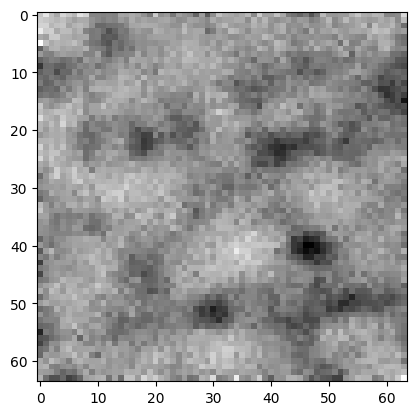

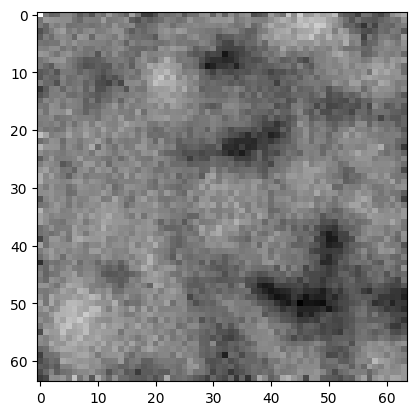

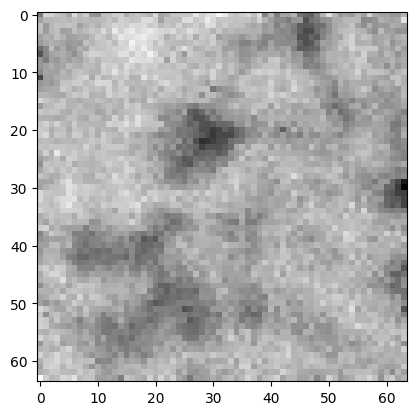

Epoch 2 : 


100%|██████████| 50/50 [00:01<00:00, 36.06it/s]


loss 0.19627823359722774
Epoch 3 : 


100%|██████████| 50/50 [00:01<00:00, 35.12it/s]


loss 0.17561656151653854
Epoch 4 : 


100%|██████████| 50/50 [00:01<00:00, 34.90it/s]


loss 0.12267982318866505
Epoch 5 : 


100%|██████████| 50/50 [00:01<00:00, 34.64it/s]


loss 0.15541947554189586
Epoch 6 : 


100%|██████████| 50/50 [00:01<00:00, 32.36it/s]


loss 0.1782702449216137
Epoch 7 : 


100%|██████████| 50/50 [00:01<00:00, 31.99it/s]


loss 0.16188298972271517
Epoch 8 : 


100%|██████████| 50/50 [00:01<00:00, 33.91it/s]


loss 0.14865639198804362
Epoch 9 : 


100%|██████████| 50/50 [00:01<00:00, 34.96it/s]


loss 0.16573994663814334
Epoch 10 : 


100%|██████████| 50/50 [00:01<00:00, 35.26it/s]


loss 0.11828498052155732
Epoch 11 : 


100%|██████████| 50/50 [00:01<00:00, 35.42it/s]


loss 0.1297287632494518
Epoch 12 : 


100%|██████████| 50/50 [00:01<00:00, 35.55it/s]


loss 0.1583519829698622
Epoch 13 : 


100%|██████████| 50/50 [00:01<00:00, 35.34it/s]


loss 0.17655523393187877
Epoch 14 : 


100%|██████████| 50/50 [00:01<00:00, 35.40it/s]


loss 0.16085084258044563
Epoch 15 : 


100%|██████████| 50/50 [00:01<00:00, 35.35it/s]


loss 0.10085032206981823
Epoch 16 : 


100%|██████████| 50/50 [00:01<00:00, 35.12it/s]


loss 0.1341754445405786
Epoch 17 : 


100%|██████████| 50/50 [00:01<00:00, 35.26it/s]


loss 0.16549584975533782
Epoch 18 : 


100%|██████████| 50/50 [00:01<00:00, 35.22it/s]


loss 0.12477966459052348
Epoch 19 : 


100%|██████████| 50/50 [00:01<00:00, 35.09it/s]


loss 0.1581107189356293
Epoch 20 : 


100%|██████████| 50/50 [00:01<00:00, 34.76it/s]


loss 0.17106469763916468
Epoch 21 : 


100%|██████████| 50/50 [00:01<00:00, 31.87it/s]


loss 0.11590843578564423
torch.Size([3, 1, 64, 64])


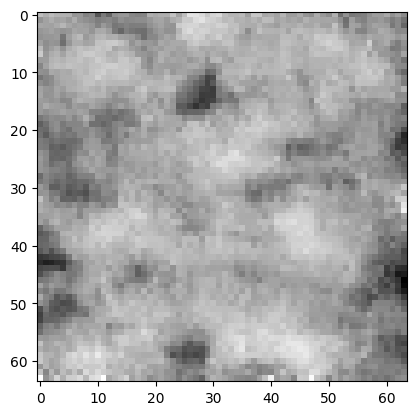

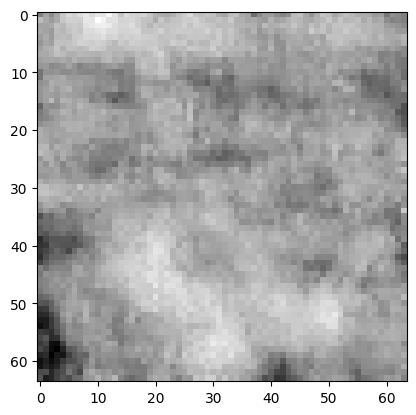

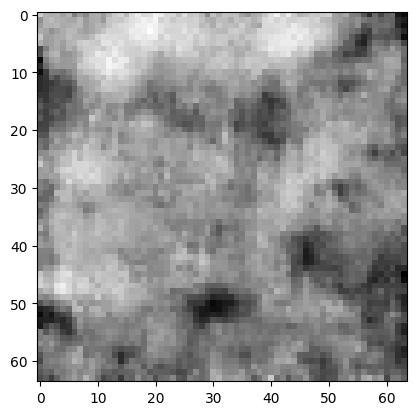

Epoch 22 : 


100%|██████████| 50/50 [00:01<00:00, 32.71it/s]


loss 0.12445457811014135
Epoch 23 : 


100%|██████████| 50/50 [00:01<00:00, 32.07it/s]


loss 0.13964311159774592
Epoch 24 : 


100%|██████████| 50/50 [00:01<00:00, 33.92it/s]


loss 0.11491072691249994
Epoch 25 : 


100%|██████████| 50/50 [00:01<00:00, 35.14it/s]


loss 0.09924738856104957
Epoch 26 : 


100%|██████████| 50/50 [00:01<00:00, 35.25it/s]


loss 0.1477379644675521
Epoch 27 : 


100%|██████████| 50/50 [00:01<00:00, 34.99it/s]


loss 0.11893482404311798
Epoch 28 : 


100%|██████████| 50/50 [00:01<00:00, 35.43it/s]


loss 0.11858420429754486
Epoch 29 : 


100%|██████████| 50/50 [00:01<00:00, 35.18it/s]


loss 0.11984542827293682
Epoch 30 : 


100%|██████████| 50/50 [00:01<00:00, 34.87it/s]


loss 0.09662898552626023
Epoch 31 : 


100%|██████████| 50/50 [00:01<00:00, 33.24it/s]


loss 0.13155692312464817
Epoch 32 : 


100%|██████████| 50/50 [00:01<00:00, 31.81it/s]


loss 0.10469594353175567
Epoch 33 : 


100%|██████████| 50/50 [00:01<00:00, 31.70it/s]


loss 0.1771502358721153
Epoch 34 : 


100%|██████████| 50/50 [00:01<00:00, 33.15it/s]


loss 0.12578684724334738
Epoch 35 : 


100%|██████████| 50/50 [00:01<00:00, 31.39it/s]


loss 0.11686717933865877
Epoch 36 : 


100%|██████████| 50/50 [00:01<00:00, 32.78it/s]


loss 0.12468885896998046
Epoch 37 : 


100%|██████████| 50/50 [00:01<00:00, 34.00it/s]


loss 0.09985599431228376
Epoch 38 : 


100%|██████████| 50/50 [00:01<00:00, 34.56it/s]


loss 0.11096204267265916
Epoch 39 : 


100%|██████████| 50/50 [00:01<00:00, 34.75it/s]


loss 0.12966287233956006
Epoch 40 : 


100%|██████████| 50/50 [00:01<00:00, 34.78it/s]


loss 0.11398633018932194
Epoch 41 : 


100%|██████████| 50/50 [00:01<00:00, 34.16it/s]


loss 0.11485222696693599
torch.Size([3, 1, 64, 64])


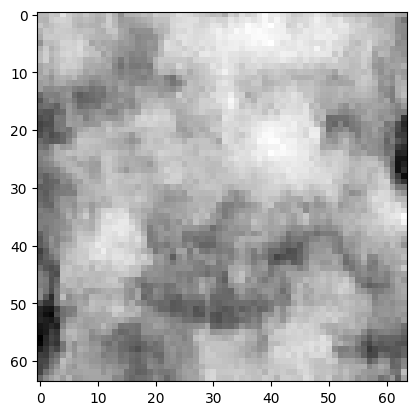

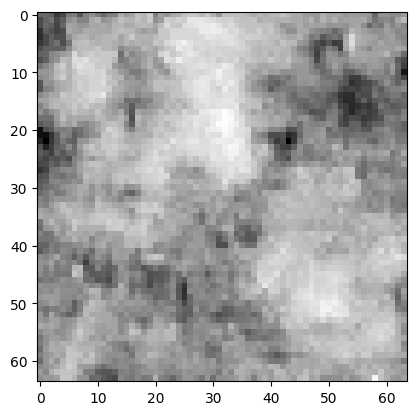

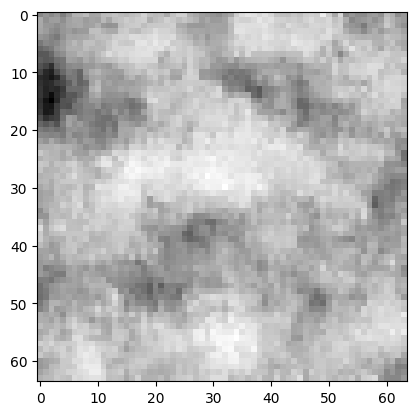

Epoch 42 : 


100%|██████████| 50/50 [00:01<00:00, 35.27it/s]


loss 0.13787455392549064
Epoch 43 : 


100%|██████████| 50/50 [00:01<00:00, 35.02it/s]


loss 0.15104113848473807
Epoch 44 : 


100%|██████████| 50/50 [00:01<00:00, 34.81it/s]


loss 0.11458423812045343
Epoch 45 : 


100%|██████████| 50/50 [00:01<00:00, 34.78it/s]


loss 0.11495059574440561
Epoch 46 : 


100%|██████████| 50/50 [00:01<00:00, 34.94it/s]


loss 0.10201504370369946
Epoch 47 : 


100%|██████████| 50/50 [00:01<00:00, 34.88it/s]


loss 0.13175280257700975
Epoch 48 : 


100%|██████████| 50/50 [00:01<00:00, 34.96it/s]


loss 0.12377190020130223
Epoch 49 : 


100%|██████████| 50/50 [00:01<00:00, 34.85it/s]


loss 0.16272733765343242
Epoch 50 : 


100%|██████████| 50/50 [00:01<00:00, 34.78it/s]


loss 0.10680976474761297
Epoch 51 : 


100%|██████████| 50/50 [00:01<00:00, 34.87it/s]


loss 0.13052882744201427
Epoch 52 : 


100%|██████████| 50/50 [00:01<00:00, 34.70it/s]


loss 0.11205999637151293
Epoch 53 : 


100%|██████████| 50/50 [00:01<00:00, 35.06it/s]


loss 0.1188250621879609
Epoch 54 : 


100%|██████████| 50/50 [00:01<00:00, 35.10it/s]


loss 0.09019204907258115
Epoch 55 : 


100%|██████████| 50/50 [00:01<00:00, 34.88it/s]


loss 0.11175710671680228
Epoch 56 : 


100%|██████████| 50/50 [00:01<00:00, 34.40it/s]


loss 0.11463785688669234
Epoch 57 : 


100%|██████████| 50/50 [00:01<00:00, 32.51it/s]


loss 0.16277616106771128
Epoch 58 : 


100%|██████████| 50/50 [00:01<00:00, 34.41it/s]


loss 0.10837380977942025
Epoch 59 : 


100%|██████████| 50/50 [00:01<00:00, 34.87it/s]


loss 0.1365161562407406
Epoch 60 : 


100%|██████████| 50/50 [00:01<00:00, 34.85it/s]


loss 0.08014083035900377
Epoch 61 : 


100%|██████████| 50/50 [00:01<00:00, 35.04it/s]


loss 0.14029026293821323
torch.Size([3, 1, 64, 64])


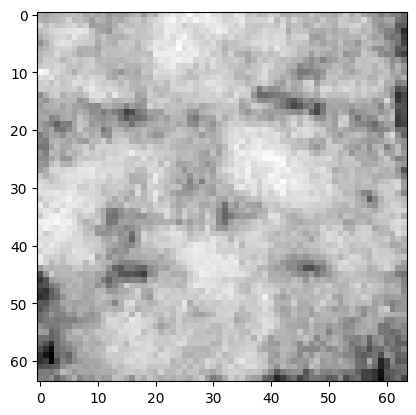

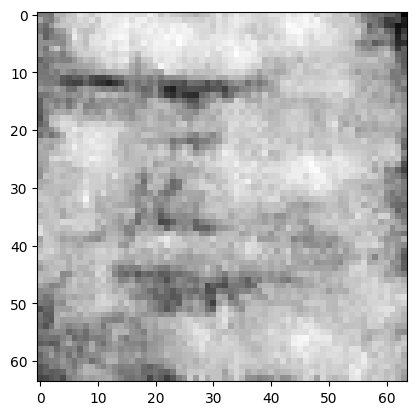

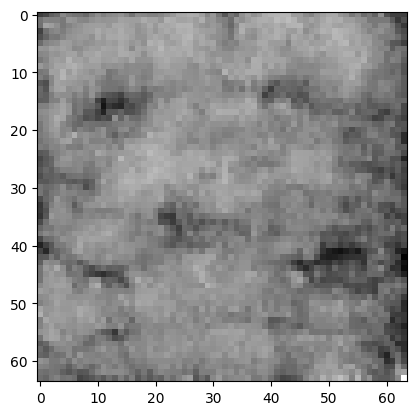

Epoch 62 : 


100%|██████████| 50/50 [00:01<00:00, 35.02it/s]


loss 0.14634432756643742
Epoch 63 : 


100%|██████████| 50/50 [00:01<00:00, 34.62it/s]


loss 0.0825860236270929
Epoch 64 : 


100%|██████████| 50/50 [00:01<00:00, 34.07it/s]


loss 0.08079949949627667
Epoch 65 : 


100%|██████████| 50/50 [00:01<00:00, 34.02it/s]


loss 0.09581843531565411
Epoch 66 : 


100%|██████████| 50/50 [00:01<00:00, 34.29it/s]


loss 0.10495707059647008
Epoch 67 : 


100%|██████████| 50/50 [00:01<00:00, 34.25it/s]


loss 0.11281795748173197
Epoch 68 : 


100%|██████████| 50/50 [00:01<00:00, 34.38it/s]


loss 0.1248946276486474
Epoch 69 : 


100%|██████████| 50/50 [00:01<00:00, 34.39it/s]


loss 0.14299076429952515
Epoch 70 : 


100%|██████████| 50/50 [00:01<00:00, 34.28it/s]


loss 0.11070418852942175
Epoch 71 : 


100%|██████████| 50/50 [00:01<00:00, 34.65it/s]


loss 0.11752082263183783
Epoch 72 : 


100%|██████████| 50/50 [00:01<00:00, 34.88it/s]


loss 0.10927092439058536
Epoch 73 : 


100%|██████████| 50/50 [00:01<00:00, 35.04it/s]


loss 0.1187506031819895
Epoch 74 : 


100%|██████████| 50/50 [00:01<00:00, 32.31it/s]


loss 0.10429074657575745
Epoch 75 : 


100%|██████████| 50/50 [00:01<00:00, 31.50it/s]


loss 0.108975797747308
Epoch 76 : 


100%|██████████| 50/50 [00:01<00:00, 32.79it/s]


loss 0.15293985364639262
Epoch 77 : 


100%|██████████| 50/50 [00:01<00:00, 34.58it/s]


loss 0.12633523565394036
Epoch 78 : 


100%|██████████| 50/50 [00:01<00:00, 32.57it/s]


loss 0.12852313204380833
Epoch 79 : 


100%|██████████| 50/50 [00:01<00:00, 32.72it/s]


loss 0.11766328008049395
Epoch 80 : 


100%|██████████| 50/50 [00:01<00:00, 33.63it/s]


loss 0.11569086389215871
Epoch 81 : 


100%|██████████| 50/50 [00:01<00:00, 33.73it/s]


loss 0.09099131081443299
torch.Size([3, 1, 64, 64])


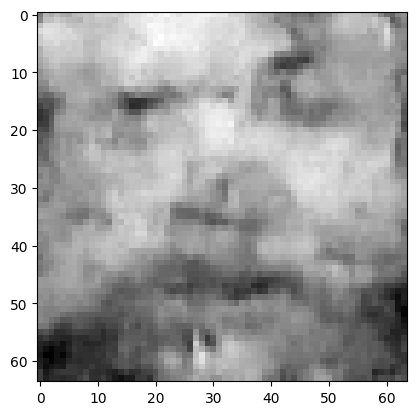

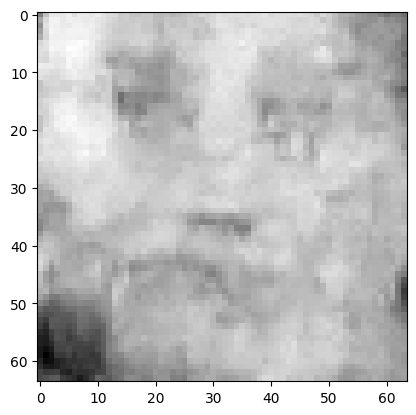

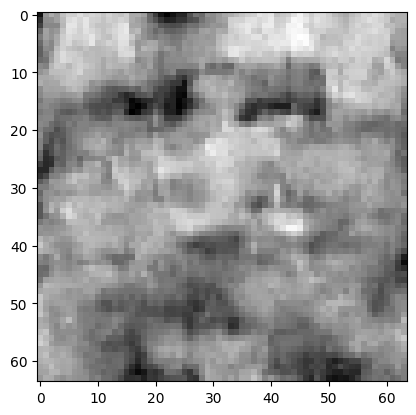

Epoch 82 : 


100%|██████████| 50/50 [00:01<00:00, 35.10it/s]


loss 0.11652179591426985
Epoch 83 : 


100%|██████████| 50/50 [00:01<00:00, 34.57it/s]


loss 0.14188765480572474
Epoch 84 : 


100%|██████████| 50/50 [00:01<00:00, 34.53it/s]


loss 0.12521098820097645
Epoch 85 : 


100%|██████████| 50/50 [00:01<00:00, 32.83it/s]


loss 0.1299347255472179
Epoch 86 : 


100%|██████████| 50/50 [00:01<00:00, 34.55it/s]


loss 0.11432915633060936
Epoch 87 : 


100%|██████████| 50/50 [00:01<00:00, 35.01it/s]


loss 0.11699147139574931
Epoch 88 : 


100%|██████████| 50/50 [00:01<00:00, 34.75it/s]


loss 0.10877937519008096
Epoch 89 : 


100%|██████████| 50/50 [00:01<00:00, 34.69it/s]


loss 0.11469109600375901
Epoch 90 : 


100%|██████████| 50/50 [00:01<00:00, 33.15it/s]


loss 0.09041931079964931
Epoch 91 : 


100%|██████████| 50/50 [00:01<00:00, 34.24it/s]


loss 0.10703746390496219
Epoch 92 : 


100%|██████████| 50/50 [00:01<00:00, 34.39it/s]


loss 0.08088898809872908
Epoch 93 : 


100%|██████████| 50/50 [00:01<00:00, 34.64it/s]


loss 0.10305932787399899
Epoch 94 : 


100%|██████████| 50/50 [00:01<00:00, 34.77it/s]


loss 0.12777116944947442
Epoch 95 : 


100%|██████████| 50/50 [00:01<00:00, 34.85it/s]


loss 0.103306185780062
Epoch 96 : 


100%|██████████| 50/50 [00:01<00:00, 34.65it/s]


loss 0.1262860924336011
Epoch 97 : 


100%|██████████| 50/50 [00:01<00:00, 34.62it/s]


loss 0.06983885646040691
Epoch 98 : 


100%|██████████| 50/50 [00:01<00:00, 34.17it/s]


loss 0.08142121924688912
Epoch 99 : 


100%|██████████| 50/50 [00:01<00:00, 34.20it/s]

loss 0.08279312625315871


In [13]:
train_ddpm(100, 0.001, 1, 0.0000)

Epoch 0 : 


100%|██████████| 50/50 [00:02<00:00, 19.51it/s]


loss 0.07629573265882472
Epoch 1 : 


100%|██████████| 50/50 [00:02<00:00, 20.73it/s]


loss 0.10514038385650024
torch.Size([3, 1, 64, 64])


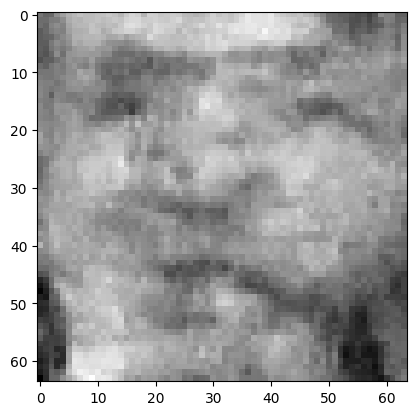

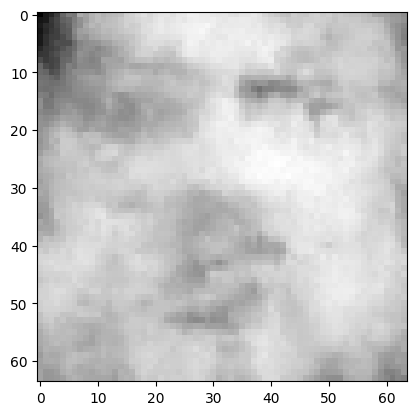

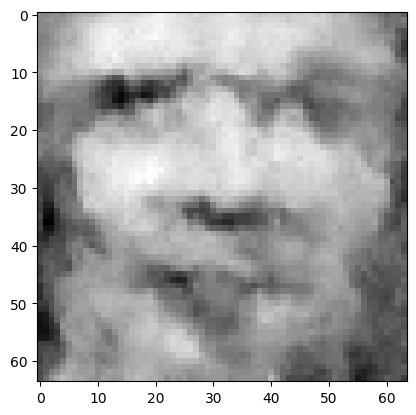

Epoch 2 : 


100%|██████████| 50/50 [00:02<00:00, 21.16it/s]


loss 0.11676617463080195
Epoch 3 : 


100%|██████████| 50/50 [00:02<00:00, 21.82it/s]


loss 0.0813942578181403
Epoch 4 : 


100%|██████████| 50/50 [00:02<00:00, 18.92it/s]


loss 0.10046163840284808
Epoch 5 : 


100%|██████████| 50/50 [00:02<00:00, 21.48it/s]


loss 0.1252079422145029
Epoch 6 : 


100%|██████████| 50/50 [00:02<00:00, 19.98it/s]


loss 0.1503520211891543
Epoch 7 : 


100%|██████████| 50/50 [00:02<00:00, 20.86it/s]


loss 0.08940255460207124
Epoch 8 : 


100%|██████████| 50/50 [00:02<00:00, 21.09it/s]


loss 0.10303707371186063
Epoch 9 : 


100%|██████████| 50/50 [00:02<00:00, 19.43it/s]


loss 0.10783741500179149
Epoch 10 : 


100%|██████████| 50/50 [00:02<00:00, 23.65it/s]


loss 0.11349218681030009
Epoch 11 : 


100%|██████████| 50/50 [00:02<00:00, 20.70it/s]


loss 0.13398129479955678
Epoch 12 : 


100%|██████████| 50/50 [00:02<00:00, 19.76it/s]


loss 0.08851201073687127
Epoch 13 : 


100%|██████████| 50/50 [00:02<00:00, 17.06it/s]


loss 0.11135262295282522
Epoch 14 : 


100%|██████████| 50/50 [00:02<00:00, 21.67it/s]


loss 0.0932393292697708
Epoch 15 : 


100%|██████████| 50/50 [00:02<00:00, 20.18it/s]


loss 0.11072333329824494
Epoch 16 : 


100%|██████████| 50/50 [00:02<00:00, 19.46it/s]


loss 0.10247390074965755
Epoch 17 : 


100%|██████████| 50/50 [00:02<00:00, 20.98it/s]


loss 0.08193533035172716
Epoch 18 : 


100%|██████████| 50/50 [00:02<00:00, 20.08it/s]


loss 0.1061332382296094
Epoch 19 : 


100%|██████████| 50/50 [00:02<00:00, 20.20it/s]


loss 0.10420362678287817
Epoch 20 : 


100%|██████████| 50/50 [00:02<00:00, 18.86it/s]


loss 0.09843884836679273
Epoch 21 : 


100%|██████████| 50/50 [00:02<00:00, 21.08it/s]


loss 0.09754622491325929
torch.Size([3, 1, 64, 64])


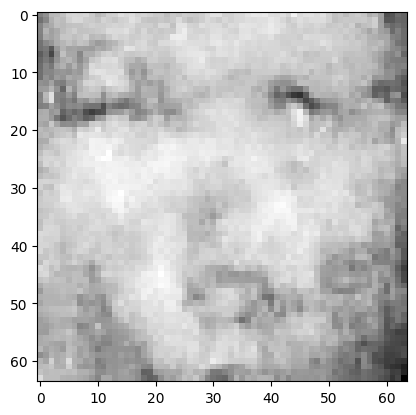

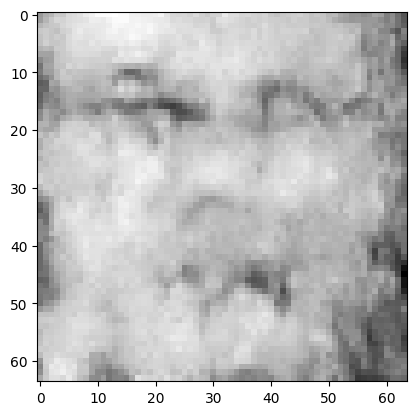

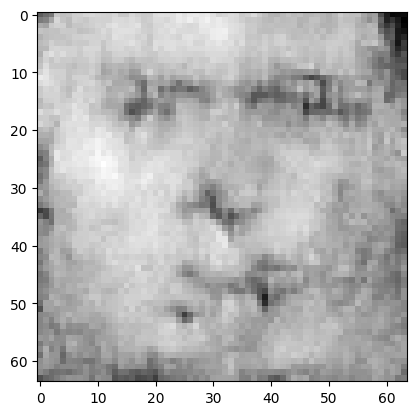

Epoch 22 : 


100%|██████████| 50/50 [00:02<00:00, 23.17it/s]


loss 0.10125743318545413
Epoch 23 : 


100%|██████████| 50/50 [00:02<00:00, 20.80it/s]


loss 0.09196842817861249
Epoch 24 : 


100%|██████████| 50/50 [00:02<00:00, 20.78it/s]


loss 0.0841454061238935
Epoch 25 : 


100%|██████████| 50/50 [00:02<00:00, 17.14it/s]


loss 0.09798876768820704
Epoch 26 : 


100%|██████████| 50/50 [00:02<00:00, 17.76it/s]


loss 0.08204288979992104
Epoch 27 : 


100%|██████████| 50/50 [00:02<00:00, 17.54it/s]


loss 0.13605333779263795
Epoch 28 : 


100%|██████████| 50/50 [00:02<00:00, 17.35it/s]


loss 0.07677904922051704
Epoch 29 : 


100%|██████████| 50/50 [00:02<00:00, 19.70it/s]


loss 0.1154398018012292
Epoch 30 : 


100%|██████████| 50/50 [00:02<00:00, 20.95it/s]


loss 0.12679712984769276
Epoch 31 : 


100%|██████████| 50/50 [00:02<00:00, 22.51it/s]


loss 0.0876770179642753
Epoch 32 : 


100%|██████████| 50/50 [00:02<00:00, 19.71it/s]


loss 0.0879798624683257
Epoch 33 : 


100%|██████████| 50/50 [00:02<00:00, 21.18it/s]


loss 0.06504695772724116
Epoch 34 : 


100%|██████████| 50/50 [00:02<00:00, 20.95it/s]


loss 0.10418266888444361
Epoch 35 : 


100%|██████████| 50/50 [00:02<00:00, 19.38it/s]


loss 0.07743561050506281
Epoch 36 : 


100%|██████████| 50/50 [00:02<00:00, 24.27it/s]


loss 0.13049990764233133
Epoch 37 : 


100%|██████████| 50/50 [00:02<00:00, 20.94it/s]


loss 0.09952914350942674
Epoch 38 : 


100%|██████████| 50/50 [00:02<00:00, 20.69it/s]


loss 0.09734762395483608
Epoch 39 : 


100%|██████████| 50/50 [00:02<00:00, 19.14it/s]


loss 0.09235274698143751
Epoch 40 : 


100%|██████████| 50/50 [00:02<00:00, 19.05it/s]


loss 0.09765957922545605
Epoch 41 : 


100%|██████████| 50/50 [00:02<00:00, 22.02it/s]


loss 0.0801977575485151
torch.Size([3, 1, 64, 64])


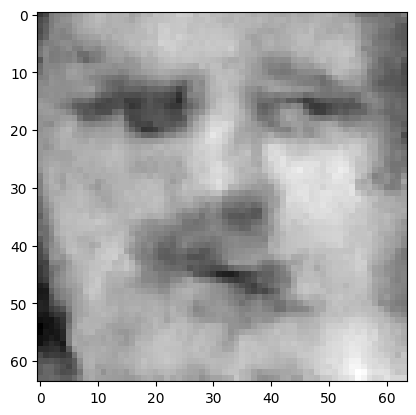

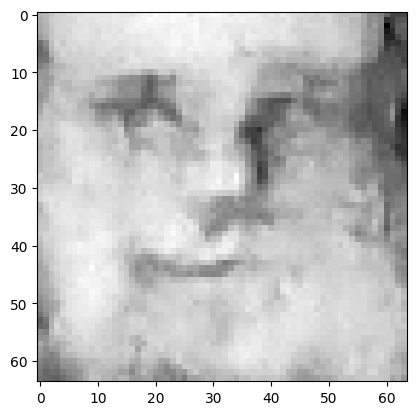

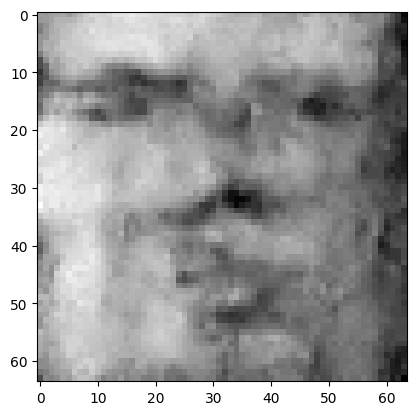

Epoch 42 : 


100%|██████████| 50/50 [00:02<00:00, 21.62it/s]


loss 0.10523811777005801
Epoch 43 : 


100%|██████████| 50/50 [00:02<00:00, 17.92it/s]


loss 0.10008280742942968
Epoch 44 : 


100%|██████████| 50/50 [00:02<00:00, 17.92it/s]


loss 0.09171826280654141
Epoch 45 : 


100%|██████████| 50/50 [00:02<00:00, 19.72it/s]


loss 0.1060955182210349
Epoch 46 : 


100%|██████████| 50/50 [00:02<00:00, 22.34it/s]


loss 0.09113834031978478
Epoch 47 : 


100%|██████████| 50/50 [00:02<00:00, 21.35it/s]


loss 0.10134740760105418
Epoch 48 : 


100%|██████████| 50/50 [00:02<00:00, 21.49it/s]


loss 0.10890397828368205
Epoch 49 : 


100%|██████████| 50/50 [00:02<00:00, 18.34it/s]


loss 0.12331817083159208
Epoch 50 : 


100%|██████████| 50/50 [00:02<00:00, 18.48it/s]


loss 0.11230966698511555
Epoch 51 : 


100%|██████████| 50/50 [00:03<00:00, 16.37it/s]


loss 0.11955805102497949
Epoch 52 : 


100%|██████████| 50/50 [00:02<00:00, 18.65it/s]


loss 0.10666119363915726
Epoch 53 : 


100%|██████████| 50/50 [00:02<00:00, 21.60it/s]


loss 0.10115073371961487
Epoch 54 : 


100%|██████████| 50/50 [00:02<00:00, 21.53it/s]


loss 0.09316069211605743
Epoch 55 : 


100%|██████████| 50/50 [00:02<00:00, 20.74it/s]


loss 0.09615270337993587
Epoch 56 : 


100%|██████████| 50/50 [00:02<00:00, 20.54it/s]


loss 0.11798684097456187
Epoch 57 : 


100%|██████████| 50/50 [00:02<00:00, 20.50it/s]


loss 0.0871073162899851
Epoch 58 : 


100%|██████████| 50/50 [00:02<00:00, 19.54it/s]


loss 0.1091391416104977
Epoch 59 : 


100%|██████████| 50/50 [00:02<00:00, 22.67it/s]


loss 0.14598175988555573
Epoch 60 : 


100%|██████████| 50/50 [00:02<00:00, 18.90it/s]


loss 0.11561259300104464
Epoch 61 : 


100%|██████████| 50/50 [00:02<00:00, 20.09it/s]


loss 0.10336172384886642
torch.Size([3, 1, 64, 64])


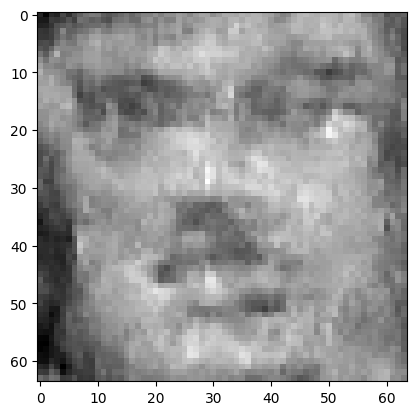

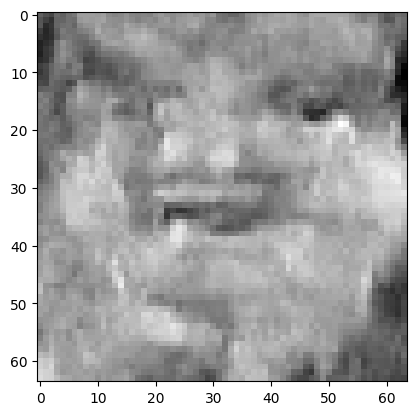

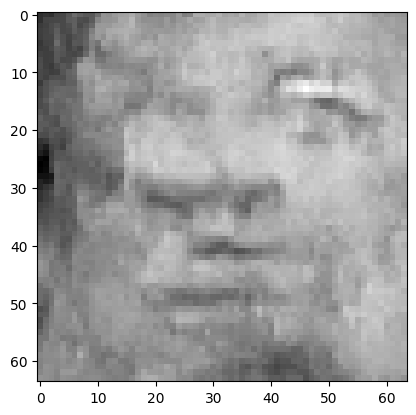

Epoch 62 : 


100%|██████████| 50/50 [00:02<00:00, 18.12it/s]


loss 0.06854320839227086
Epoch 63 : 


100%|██████████| 50/50 [00:02<00:00, 21.11it/s]


loss 0.0885039915954174
Epoch 64 : 


100%|██████████| 50/50 [00:02<00:00, 20.03it/s]


loss 0.08141750184461867
Epoch 65 : 


100%|██████████| 50/50 [00:02<00:00, 20.81it/s]


loss 0.12368839788892581
Epoch 66 : 


100%|██████████| 50/50 [00:02<00:00, 23.15it/s]


loss 0.09839988739342821
Epoch 67 : 


100%|██████████| 50/50 [00:02<00:00, 19.59it/s]


loss 0.08001584213371953
Epoch 68 : 


100%|██████████| 50/50 [00:02<00:00, 19.19it/s]


loss 0.07632605515402183
Epoch 69 : 


100%|██████████| 50/50 [00:02<00:00, 20.54it/s]


loss 0.1322635331046581
Epoch 70 : 


100%|██████████| 50/50 [00:02<00:00, 20.03it/s]


loss 0.09783657662025885
Epoch 71 : 


100%|██████████| 50/50 [00:02<00:00, 21.51it/s]


loss 0.10856738465781748
Epoch 72 : 


100%|██████████| 50/50 [00:02<00:00, 22.20it/s]


loss 0.08967814639962032
Epoch 73 : 


100%|██████████| 50/50 [00:02<00:00, 20.22it/s]


loss 0.09532892452061528
Epoch 74 : 


100%|██████████| 50/50 [00:02<00:00, 21.44it/s]


loss 0.10266541086590039
Epoch 75 : 


100%|██████████| 50/50 [00:02<00:00, 20.15it/s]


loss 0.10208841691471428
Epoch 76 : 


100%|██████████| 50/50 [00:02<00:00, 22.46it/s]


loss 0.10175044401322067
Epoch 77 : 


100%|██████████| 50/50 [00:02<00:00, 20.88it/s]


loss 0.0877889003818241
Epoch 78 : 


100%|██████████| 50/50 [00:02<00:00, 16.82it/s]


loss 0.09083934522405802
Epoch 79 : 


100%|██████████| 50/50 [00:02<00:00, 20.87it/s]


loss 0.07806964272726555
Epoch 80 : 


100%|██████████| 50/50 [00:02<00:00, 19.72it/s]


loss 0.10375920192627607
Epoch 81 : 


100%|██████████| 50/50 [00:02<00:00, 20.28it/s]


loss 0.10395180314127367
torch.Size([3, 1, 64, 64])


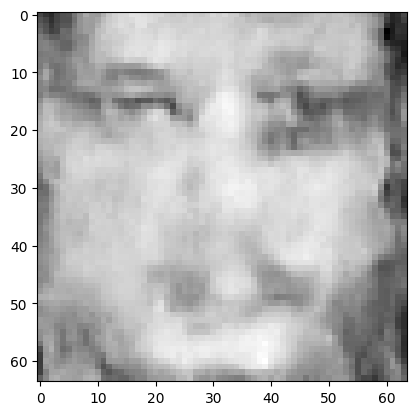

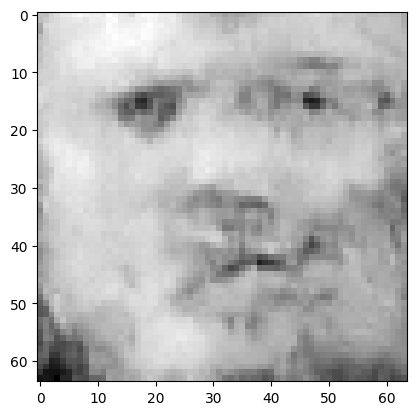

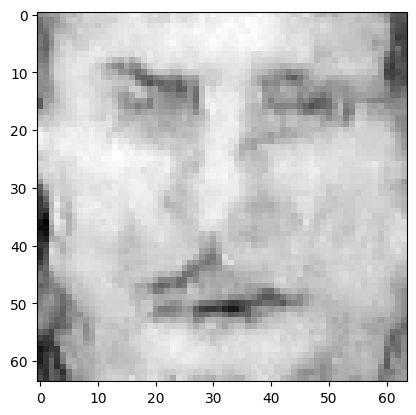

Epoch 82 : 


100%|██████████| 50/50 [00:02<00:00, 19.91it/s]


loss 0.12117586698778297
Epoch 83 : 


100%|██████████| 50/50 [00:02<00:00, 23.37it/s]


loss 0.08084265676016122
Epoch 84 : 


100%|██████████| 50/50 [00:02<00:00, 20.55it/s]


loss 0.10195984639066229
Epoch 85 : 


100%|██████████| 50/50 [00:02<00:00, 18.83it/s]


loss 0.11325098182104318
Epoch 86 : 


100%|██████████| 50/50 [00:02<00:00, 19.35it/s]


loss 0.1083421373010855
Epoch 87 : 


100%|██████████| 50/50 [00:02<00:00, 21.13it/s]


loss 0.0828787055966139
Epoch 88 : 


100%|██████████| 50/50 [00:02<00:00, 20.32it/s]


loss 0.07592340163360364
Epoch 89 : 


100%|██████████| 50/50 [00:02<00:00, 20.04it/s]


loss 0.10142315006491336
Epoch 90 : 


100%|██████████| 50/50 [00:02<00:00, 20.78it/s]


loss 0.0938573687548892
Epoch 91 : 


100%|██████████| 50/50 [00:02<00:00, 20.87it/s]


loss 0.08134064359098014
Epoch 92 : 


100%|██████████| 50/50 [00:02<00:00, 18.41it/s]


loss 0.0930987271310127
Epoch 93 : 


100%|██████████| 50/50 [00:02<00:00, 24.34it/s]


loss 0.08611182138556897
Epoch 94 : 


100%|██████████| 50/50 [00:02<00:00, 21.77it/s]


loss 0.11219491537019212
Epoch 95 : 


100%|██████████| 50/50 [00:02<00:00, 19.21it/s]


loss 0.10106522275570323
Epoch 96 : 


100%|██████████| 50/50 [00:02<00:00, 20.45it/s]


loss 0.12132371019902798
Epoch 97 : 


100%|██████████| 50/50 [00:02<00:00, 23.39it/s]


loss 0.13149542609915876
Epoch 98 : 


100%|██████████| 50/50 [00:02<00:00, 19.78it/s]


loss 0.10627815085975015
Epoch 99 : 


100%|██████████| 50/50 [00:02<00:00, 20.25it/s]


loss 0.09386022814456886


In [9]:
train_ddpm(100, 0.001, 1, 0.0000)

Epoch 0 : 


100%|██████████| 50/50 [00:02<00:00, 19.22it/s]


loss 0.10188405780562144
Epoch 1 : 


100%|██████████| 50/50 [00:02<00:00, 20.70it/s]


loss 0.08939553726223291
torch.Size([3, 1, 64, 64])


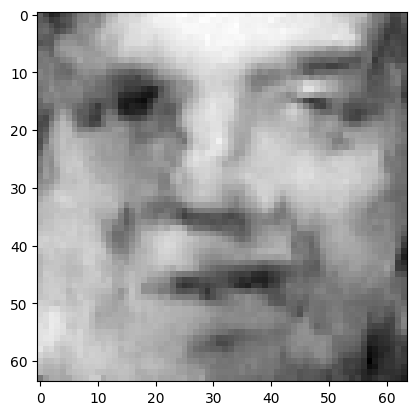

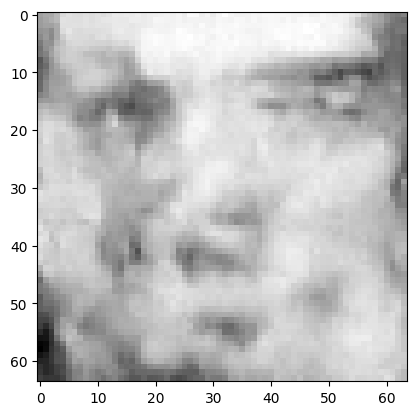

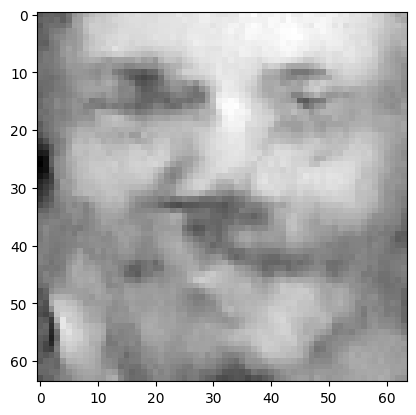

Epoch 2 : 


100%|██████████| 50/50 [00:02<00:00, 20.78it/s]


loss 0.11187786799129133
Epoch 3 : 


100%|██████████| 50/50 [00:02<00:00, 20.39it/s]


loss 0.11601502231856833
Epoch 4 : 


100%|██████████| 50/50 [00:02<00:00, 21.11it/s]


loss 0.07432962910190151
Epoch 5 : 


100%|██████████| 50/50 [00:02<00:00, 19.30it/s]


loss 0.06927796429938746
Epoch 6 : 


100%|██████████| 50/50 [00:02<00:00, 20.04it/s]


loss 0.0691334853569952
Epoch 7 : 


100%|██████████| 50/50 [00:02<00:00, 23.72it/s]


loss 0.11010381996537928
Epoch 8 : 


100%|██████████| 50/50 [00:02<00:00, 23.54it/s]


loss 0.09071949636010855
Epoch 9 : 


100%|██████████| 50/50 [00:02<00:00, 21.07it/s]


loss 0.08099536547476685
Epoch 10 : 


100%|██████████| 50/50 [00:02<00:00, 21.99it/s]


loss 0.08560683240644765
Epoch 11 : 


100%|██████████| 50/50 [00:02<00:00, 21.21it/s]


loss 0.10850770360233182
Epoch 12 : 


100%|██████████| 50/50 [00:02<00:00, 21.32it/s]


loss 0.07716651369238967
Epoch 13 : 


100%|██████████| 50/50 [00:02<00:00, 20.37it/s]


loss 0.08357769971981907
Epoch 14 : 


100%|██████████| 50/50 [00:02<00:00, 20.99it/s]


loss 0.09283241749273098
Epoch 15 : 


100%|██████████| 50/50 [00:02<00:00, 19.71it/s]


loss 0.08720132995448382
Epoch 16 : 


100%|██████████| 50/50 [00:02<00:00, 21.29it/s]


loss 0.11780510882772491
Epoch 17 : 


100%|██████████| 50/50 [00:02<00:00, 20.12it/s]


loss 0.07434811413770788
Epoch 18 : 


100%|██████████| 50/50 [00:02<00:00, 19.81it/s]


loss 0.11736566442542669
Epoch 19 : 


100%|██████████| 50/50 [00:02<00:00, 20.73it/s]


loss 0.11008115032722672
Epoch 20 : 


100%|██████████| 50/50 [00:02<00:00, 21.04it/s]


loss 0.08836858876922217
Epoch 21 : 


100%|██████████| 50/50 [00:02<00:00, 21.37it/s]


loss 0.09663558585485695
torch.Size([3, 1, 64, 64])


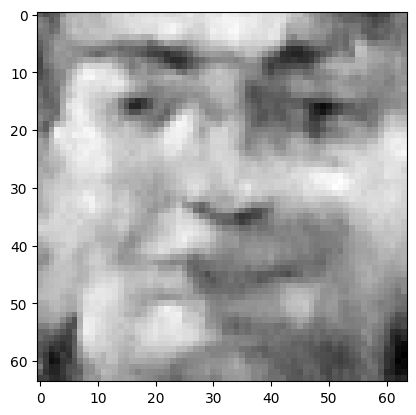

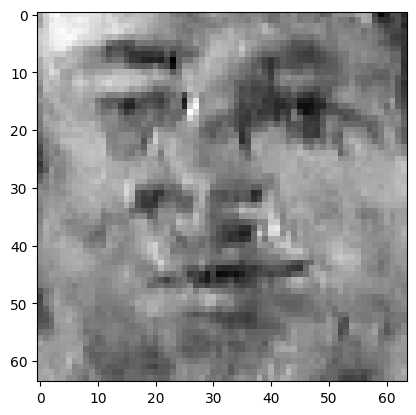

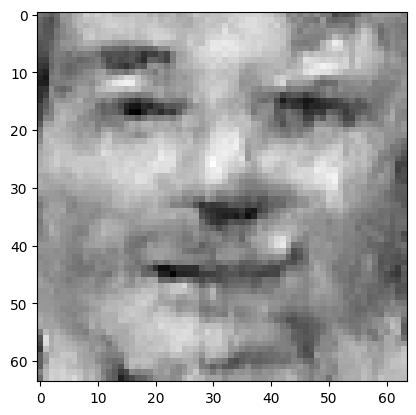

Epoch 22 : 


100%|██████████| 50/50 [00:02<00:00, 21.56it/s]


loss 0.13717415148499035
Epoch 23 : 


100%|██████████| 50/50 [00:02<00:00, 20.38it/s]


loss 0.09920307641922492
Epoch 24 : 


100%|██████████| 50/50 [00:02<00:00, 20.63it/s]


loss 0.08465428382219987
Epoch 25 : 


100%|██████████| 50/50 [00:02<00:00, 20.42it/s]


loss 0.07852141586182719
Epoch 26 : 


100%|██████████| 50/50 [00:02<00:00, 20.95it/s]


loss 0.0826512858949707
Epoch 27 : 


100%|██████████| 50/50 [00:02<00:00, 20.58it/s]


loss 0.11190918435762781
Epoch 28 : 


100%|██████████| 50/50 [00:02<00:00, 21.10it/s]


loss 0.08215762165485618
Epoch 29 : 


100%|██████████| 50/50 [00:02<00:00, 22.64it/s]


loss 0.07164121827850704
Epoch 30 : 


100%|██████████| 50/50 [00:02<00:00, 19.76it/s]


loss 0.0966155451975364
Epoch 31 : 


100%|██████████| 50/50 [00:02<00:00, 19.69it/s]


loss 0.10111025321753188
Epoch 32 : 


100%|██████████| 50/50 [00:02<00:00, 21.75it/s]


loss 0.09893030624014379
Epoch 33 : 


100%|██████████| 50/50 [00:02<00:00, 20.56it/s]


loss 0.09048723612798351
Epoch 34 : 


100%|██████████| 50/50 [00:02<00:00, 20.67it/s]


loss 0.1349502648918732
Epoch 35 : 


100%|██████████| 50/50 [00:02<00:00, 19.46it/s]


loss 0.09173265688040348
Epoch 36 : 


100%|██████████| 50/50 [00:02<00:00, 20.78it/s]


loss 0.09792043712327028
Epoch 37 : 


100%|██████████| 50/50 [00:02<00:00, 22.47it/s]


loss 0.08131456279414252
Epoch 38 : 


100%|██████████| 50/50 [00:02<00:00, 21.50it/s]


loss 0.0748454648553169
Epoch 39 : 


100%|██████████| 50/50 [00:02<00:00, 24.29it/s]


loss 0.09612474167730593
Epoch 40 : 


100%|██████████| 50/50 [00:02<00:00, 20.45it/s]


loss 0.0993953367703973
Epoch 41 : 


100%|██████████| 50/50 [00:02<00:00, 20.45it/s]


loss 0.13450542932747023
torch.Size([3, 1, 64, 64])


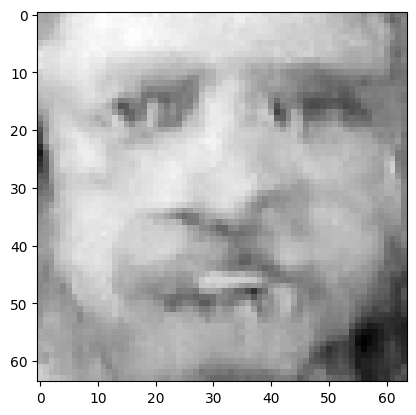

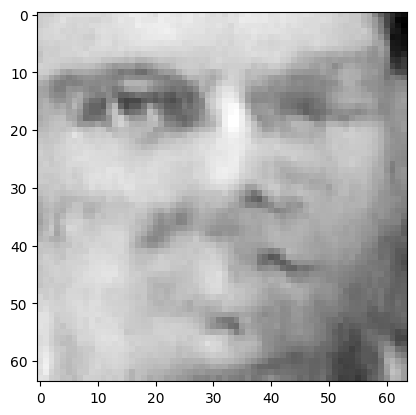

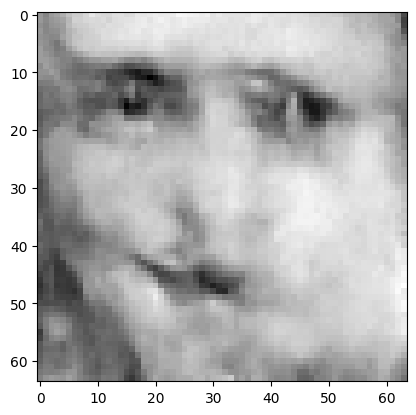

Epoch 42 : 


100%|██████████| 50/50 [00:02<00:00, 21.86it/s]


loss 0.10814505592695459
Epoch 43 : 


100%|██████████| 50/50 [00:02<00:00, 22.69it/s]


loss 0.093952670320353
Epoch 44 : 


100%|██████████| 50/50 [00:02<00:00, 21.78it/s]


loss 0.06543037590614924
Epoch 45 : 


100%|██████████| 50/50 [00:02<00:00, 21.85it/s]


loss 0.1182868513447638
Epoch 46 : 


100%|██████████| 50/50 [00:02<00:00, 23.14it/s]


loss 0.08997360176429205
Epoch 47 : 


100%|██████████| 50/50 [00:02<00:00, 23.37it/s]


loss 0.07014688120958591
Epoch 48 : 


100%|██████████| 50/50 [00:02<00:00, 19.74it/s]


loss 0.11192008264849065
Epoch 49 : 


100%|██████████| 50/50 [00:02<00:00, 21.20it/s]


loss 0.11006473296779365
Epoch 50 : 


100%|██████████| 50/50 [00:02<00:00, 19.90it/s]


loss 0.10362439820091444
Epoch 51 : 


100%|██████████| 50/50 [00:02<00:00, 21.68it/s]


loss 0.09036251885763422
Epoch 52 : 


100%|██████████| 50/50 [00:02<00:00, 19.65it/s]


loss 0.11172692709783667
Epoch 53 : 


100%|██████████| 50/50 [00:02<00:00, 21.25it/s]


loss 0.0861869549182546
Epoch 54 : 


100%|██████████| 50/50 [00:02<00:00, 20.29it/s]


loss 0.11945479304969497
Epoch 55 : 


100%|██████████| 50/50 [00:02<00:00, 19.26it/s]


loss 0.07397299774560265
Epoch 56 : 


100%|██████████| 50/50 [00:02<00:00, 24.01it/s]


loss 0.11582430478360879
Epoch 57 : 


100%|██████████| 50/50 [00:02<00:00, 21.08it/s]


loss 0.08705851978364118
Epoch 58 : 


100%|██████████| 50/50 [00:02<00:00, 22.67it/s]


loss 0.07672017791653972
Epoch 59 : 


100%|██████████| 50/50 [00:02<00:00, 20.47it/s]


loss 0.10018061446439616
Epoch 60 : 


100%|██████████| 50/50 [00:02<00:00, 20.16it/s]


loss 0.08420016156762578
Epoch 61 : 


100%|██████████| 50/50 [00:02<00:00, 20.05it/s]


loss 0.10131459066434631
torch.Size([3, 1, 64, 64])


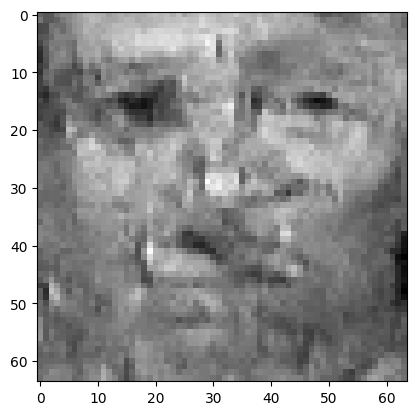

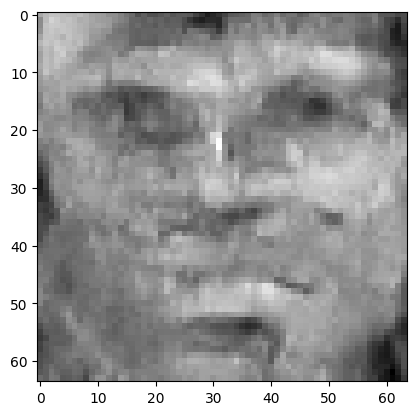

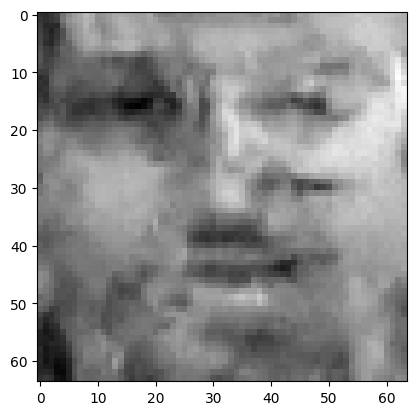

Epoch 62 : 


100%|██████████| 50/50 [00:02<00:00, 21.15it/s]


loss 0.07247392393875805
Epoch 63 : 


100%|██████████| 50/50 [00:02<00:00, 20.95it/s]


loss 0.09298263026711669
Epoch 64 : 


100%|██████████| 50/50 [00:02<00:00, 21.68it/s]


loss 0.09416193170616004
Epoch 65 : 


100%|██████████| 50/50 [00:02<00:00, 20.60it/s]


loss 0.08579230504746496
Epoch 66 : 


100%|██████████| 50/50 [00:02<00:00, 20.52it/s]


loss 0.10408081114915145
Epoch 67 : 


100%|██████████| 50/50 [00:02<00:00, 19.78it/s]


loss 0.11293900474793965
Epoch 68 : 


100%|██████████| 50/50 [00:02<00:00, 24.09it/s]


loss 0.08414332288820409
Epoch 69 : 


100%|██████████| 50/50 [00:02<00:00, 19.59it/s]


loss 0.09021806704723109
Epoch 70 : 


100%|██████████| 50/50 [00:02<00:00, 18.95it/s]


loss 0.10012605434462907
Epoch 71 : 


100%|██████████| 50/50 [00:02<00:00, 21.28it/s]


loss 0.08833952988793378
Epoch 72 : 


100%|██████████| 50/50 [00:02<00:00, 22.80it/s]


loss 0.10286034825836891
Epoch 73 : 


100%|██████████| 50/50 [00:02<00:00, 21.15it/s]


loss 0.09261748908131778
Epoch 74 : 


100%|██████████| 50/50 [00:02<00:00, 17.97it/s]


loss 0.059016645895825164
Epoch 75 : 


100%|██████████| 50/50 [00:02<00:00, 18.62it/s]


loss 0.09837396226064637
Epoch 76 : 


100%|██████████| 50/50 [00:02<00:00, 17.68it/s]


loss 0.05568813427751174
Epoch 77 : 


100%|██████████| 50/50 [00:02<00:00, 18.46it/s]


loss 0.12901690093268542
Epoch 78 : 


100%|██████████| 50/50 [00:02<00:00, 17.84it/s]


loss 0.08429794875380352
Epoch 79 : 


100%|██████████| 50/50 [00:02<00:00, 17.80it/s]


loss 0.07946571508366389
Epoch 80 : 


100%|██████████| 50/50 [00:02<00:00, 19.39it/s]


loss 0.09494239131405681
Epoch 81 : 


100%|██████████| 50/50 [00:02<00:00, 21.47it/s]


loss 0.07495761780010238
torch.Size([3, 1, 64, 64])


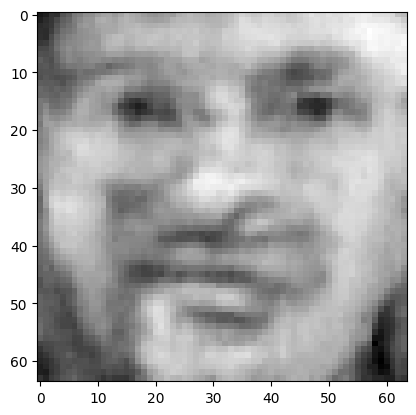

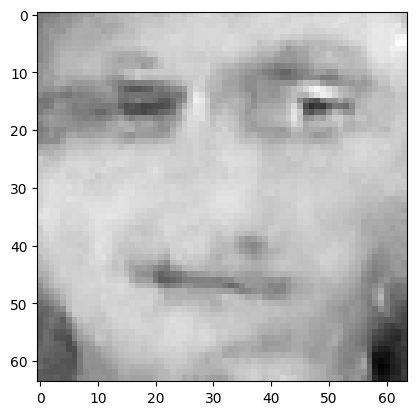

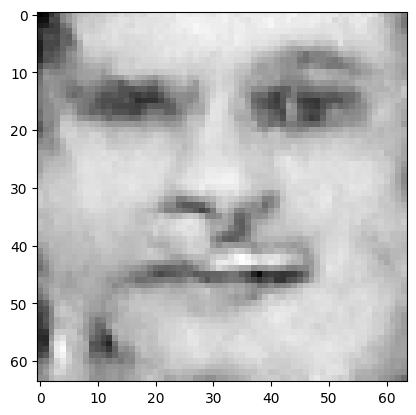

Epoch 82 : 


100%|██████████| 50/50 [00:02<00:00, 17.58it/s]


loss 0.06454657737869027
Epoch 83 : 


100%|██████████| 50/50 [00:02<00:00, 17.70it/s]


loss 0.11478184466980577
Epoch 84 : 


100%|██████████| 50/50 [00:02<00:00, 20.26it/s]


loss 0.11218098563113776
Epoch 85 : 


100%|██████████| 50/50 [00:02<00:00, 20.19it/s]


loss 0.06842646705825796
Epoch 86 : 


100%|██████████| 50/50 [00:02<00:00, 20.25it/s]


loss 0.08543004607989828
Epoch 87 : 


100%|██████████| 50/50 [00:02<00:00, 20.67it/s]


loss 0.09336973986651416
Epoch 88 : 


100%|██████████| 50/50 [00:02<00:00, 20.13it/s]


loss 0.0805968715430058
Epoch 89 : 


100%|██████████| 50/50 [00:02<00:00, 21.63it/s]


loss 0.09499428740027036
Epoch 90 : 


100%|██████████| 50/50 [00:02<00:00, 22.57it/s]


loss 0.08871781938923076
Epoch 91 : 


100%|██████████| 50/50 [00:02<00:00, 19.14it/s]


loss 0.06806601641011123
Epoch 92 : 


100%|██████████| 50/50 [00:02<00:00, 19.54it/s]


loss 0.10011199912450616
Epoch 93 : 


100%|██████████| 50/50 [00:02<00:00, 21.32it/s]


loss 0.07822773166256404
Epoch 94 : 


100%|██████████| 50/50 [00:02<00:00, 21.03it/s]


loss 0.08634532714257104
Epoch 95 : 


100%|██████████| 50/50 [00:02<00:00, 20.14it/s]


loss 0.0972733077968973
Epoch 96 : 


100%|██████████| 50/50 [00:02<00:00, 20.62it/s]


loss 0.09868455919083059
Epoch 97 : 


100%|██████████| 50/50 [00:02<00:00, 21.61it/s]


loss 0.11213703078687096
Epoch 98 : 


100%|██████████| 50/50 [00:02<00:00, 20.87it/s]


loss 0.07333963863520995
Epoch 99 : 


100%|██████████| 50/50 [00:02<00:00, 20.48it/s]


loss 0.1073441173467106
Epoch 100 : 


100%|██████████| 50/50 [00:02<00:00, 19.14it/s]


loss 0.11370065544299345
Epoch 101 : 


100%|██████████| 50/50 [00:02<00:00, 19.12it/s]


loss 0.08034097340623567
torch.Size([3, 1, 64, 64])


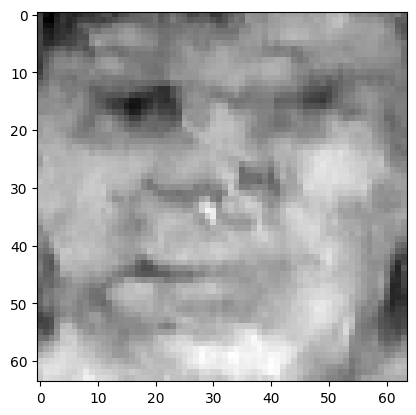

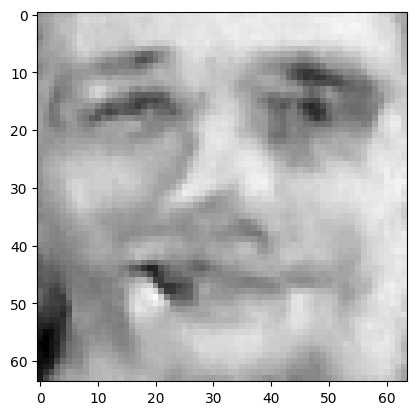

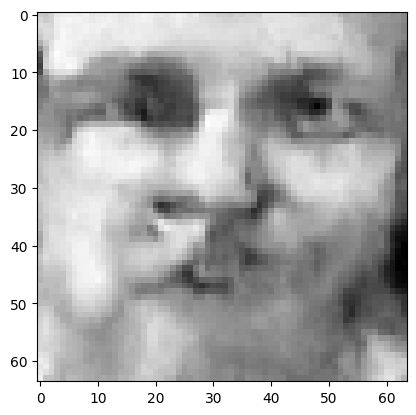

Epoch 102 : 


100%|██████████| 50/50 [00:02<00:00, 21.51it/s]


loss 0.11184593483917343
Epoch 103 : 


100%|██████████| 50/50 [00:02<00:00, 21.62it/s]


loss 0.09559777903073177
Epoch 104 : 


100%|██████████| 50/50 [00:02<00:00, 20.65it/s]


loss 0.08093225953751346
Epoch 105 : 


100%|██████████| 50/50 [00:02<00:00, 20.16it/s]


loss 0.09589149760062068
Epoch 106 : 


100%|██████████| 50/50 [00:02<00:00, 20.23it/s]


loss 0.10224412113978437
Epoch 107 : 


100%|██████████| 50/50 [00:02<00:00, 20.89it/s]


loss 0.10253988278749858
Epoch 108 : 


100%|██████████| 50/50 [00:02<00:00, 21.20it/s]


loss 0.12475145944174897
Epoch 109 : 


100%|██████████| 50/50 [00:02<00:00, 19.93it/s]


loss 0.09165287752471893
Epoch 110 : 


100%|██████████| 50/50 [00:02<00:00, 19.23it/s]


loss 0.10367876969880949
Epoch 111 : 


100%|██████████| 50/50 [00:02<00:00, 22.11it/s]


loss 0.10607049217730005
Epoch 112 : 


100%|██████████| 50/50 [00:02<00:00, 22.93it/s]


loss 0.1033145778955107
Epoch 113 : 


100%|██████████| 50/50 [00:02<00:00, 20.26it/s]


loss 0.07728722671504323
Epoch 114 : 


100%|██████████| 50/50 [00:02<00:00, 21.22it/s]


loss 0.10650758889865888
Epoch 115 : 


100%|██████████| 50/50 [00:02<00:00, 20.19it/s]


loss 0.10472421776571772
Epoch 116 : 


100%|██████████| 50/50 [00:02<00:00, 21.04it/s]


loss 0.1209018521474961
Epoch 117 : 


100%|██████████| 50/50 [00:02<00:00, 19.48it/s]


loss 0.10518865157993085
Epoch 118 : 


100%|██████████| 50/50 [00:02<00:00, 19.81it/s]


loss 0.10276099837759492
Epoch 119 : 


100%|██████████| 50/50 [00:02<00:00, 20.48it/s]


loss 0.11738241472232845
Epoch 120 : 


100%|██████████| 50/50 [00:02<00:00, 21.82it/s]


loss 0.10432086625099579
Epoch 121 : 


100%|██████████| 50/50 [00:02<00:00, 19.17it/s]


loss 0.08702068228230118
torch.Size([3, 1, 64, 64])


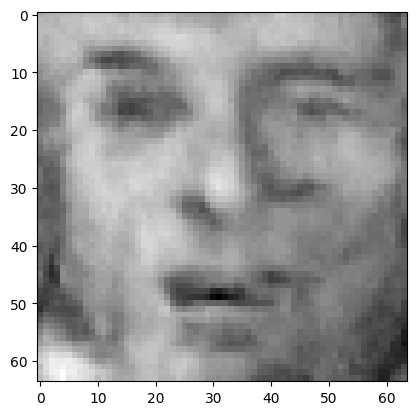

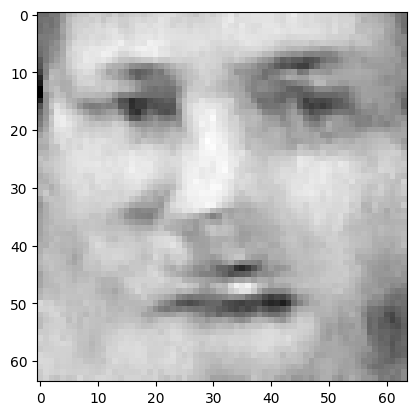

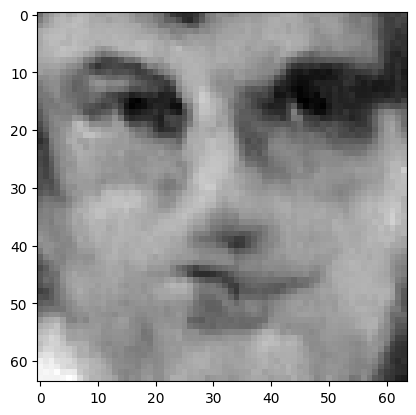

Epoch 122 : 


100%|██████████| 50/50 [00:02<00:00, 21.18it/s]


loss 0.11586793009355024
Epoch 123 : 


100%|██████████| 50/50 [00:02<00:00, 20.96it/s]


loss 0.0963616378727981
Epoch 124 : 


100%|██████████| 50/50 [00:02<00:00, 22.77it/s]


loss 0.09110024468984039
Epoch 125 : 


100%|██████████| 50/50 [00:02<00:00, 20.54it/s]


loss 0.08061178118077797
Epoch 126 : 


100%|██████████| 50/50 [00:02<00:00, 19.74it/s]


loss 0.0704671886474931
Epoch 127 : 


100%|██████████| 50/50 [00:02<00:00, 19.62it/s]


loss 0.10296958714666066
Epoch 128 : 


100%|██████████| 50/50 [00:02<00:00, 20.56it/s]


loss 0.10267694979997305
Epoch 129 : 


100%|██████████| 50/50 [00:02<00:00, 23.24it/s]


loss 0.0905913045271789
Epoch 130 : 


100%|██████████| 50/50 [00:02<00:00, 20.43it/s]


loss 0.08151937705905106
Epoch 131 : 


100%|██████████| 50/50 [00:02<00:00, 19.77it/s]


loss 0.09929807149278826
Epoch 132 : 


100%|██████████| 50/50 [00:02<00:00, 20.00it/s]


loss 0.08389829285534822
Epoch 133 : 


100%|██████████| 50/50 [00:02<00:00, 20.14it/s]


loss 0.07596289524854137
Epoch 134 : 


100%|██████████| 50/50 [00:02<00:00, 21.64it/s]


loss 0.09883732017220177
Epoch 135 : 


100%|██████████| 50/50 [00:02<00:00, 20.26it/s]


loss 0.06418113193762984
Epoch 136 : 


100%|██████████| 50/50 [00:02<00:00, 19.82it/s]


loss 0.12536149092385726
Epoch 137 : 


100%|██████████| 50/50 [00:02<00:00, 21.44it/s]


loss 0.09503849115528307
Epoch 138 : 


100%|██████████| 50/50 [00:02<00:00, 22.14it/s]


loss 0.08048045861656836
Epoch 139 : 


100%|██████████| 50/50 [00:01<00:00, 25.12it/s]


loss 0.1046023937190187
Epoch 140 : 


100%|██████████| 50/50 [00:02<00:00, 21.34it/s]


loss 0.0703939814960888
Epoch 141 : 


100%|██████████| 50/50 [00:02<00:00, 20.07it/s]


loss 0.11561252463694524
torch.Size([3, 1, 64, 64])


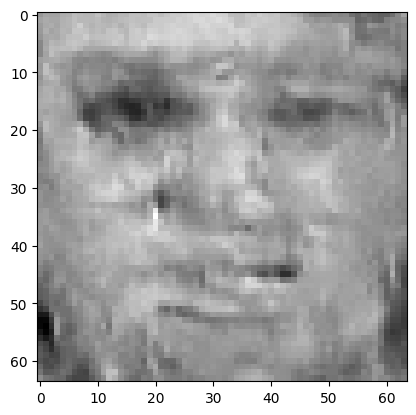

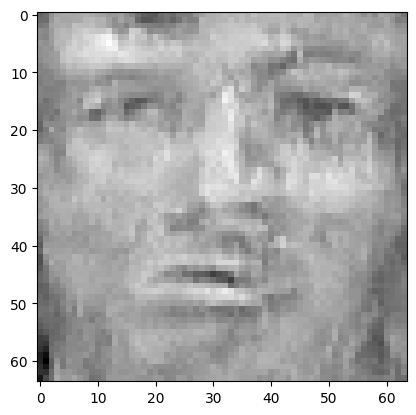

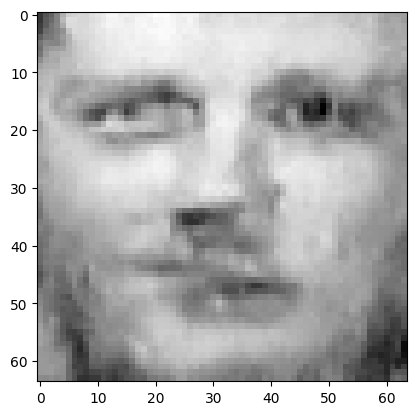

Epoch 142 : 


100%|██████████| 50/50 [00:02<00:00, 20.50it/s]


loss 0.07730490083455037
Epoch 143 : 


100%|██████████| 50/50 [00:02<00:00, 18.90it/s]


loss 0.10780615452177322
Epoch 144 : 


100%|██████████| 50/50 [00:02<00:00, 20.35it/s]


loss 0.11460490230624891
Epoch 145 : 


100%|██████████| 50/50 [00:02<00:00, 22.26it/s]


loss 0.06196853386829351
Epoch 146 : 


100%|██████████| 50/50 [00:02<00:00, 21.75it/s]


loss 0.098556026167573
Epoch 147 : 


100%|██████████| 50/50 [00:02<00:00, 18.05it/s]


loss 0.09233667222419013
Epoch 148 : 


100%|██████████| 50/50 [00:02<00:00, 20.67it/s]


loss 0.08871201944993794
Epoch 149 : 


100%|██████████| 50/50 [00:02<00:00, 18.48it/s]


loss 0.08491212199284237
Epoch 150 : 


100%|██████████| 50/50 [00:02<00:00, 18.84it/s]


loss 0.10457357078955173
Epoch 151 : 


100%|██████████| 50/50 [00:02<00:00, 17.36it/s]


loss 0.11177497042466336
Epoch 152 : 


100%|██████████| 50/50 [00:02<00:00, 17.40it/s]


loss 0.12472464423548525
Epoch 153 : 


100%|██████████| 50/50 [00:02<00:00, 19.14it/s]


loss 0.10403509607722182
Epoch 154 : 


100%|██████████| 50/50 [00:02<00:00, 17.90it/s]


loss 0.11641943398339014
Epoch 155 : 


100%|██████████| 50/50 [00:02<00:00, 19.35it/s]


loss 0.09868170625377581
Epoch 156 : 


100%|██████████| 50/50 [00:02<00:00, 17.95it/s]


loss 0.09754364107593688
Epoch 157 : 


100%|██████████| 50/50 [00:02<00:00, 19.85it/s]


loss 0.09500807846604402
Epoch 158 : 


100%|██████████| 50/50 [00:02<00:00, 20.89it/s]


loss 0.09501611533931348
Epoch 159 : 


100%|██████████| 50/50 [00:02<00:00, 19.84it/s]


loss 0.08223752822815233
Epoch 160 : 


100%|██████████| 50/50 [00:02<00:00, 20.28it/s]


loss 0.0830806415848107
Epoch 161 : 


100%|██████████| 50/50 [00:02<00:00, 22.16it/s]


loss 0.11612747294991731
torch.Size([3, 1, 64, 64])


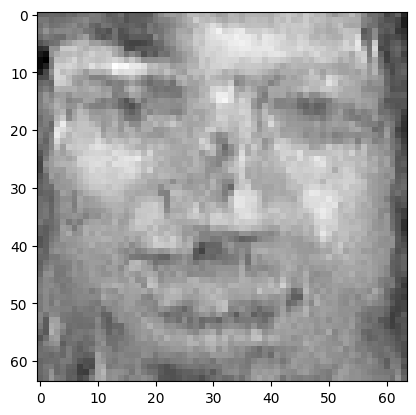

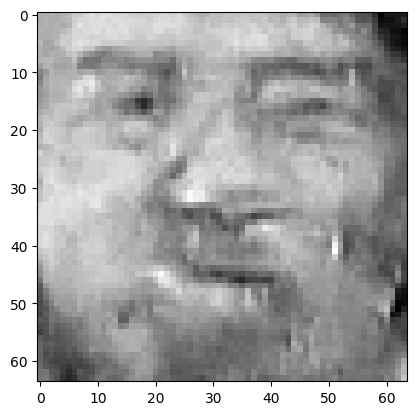

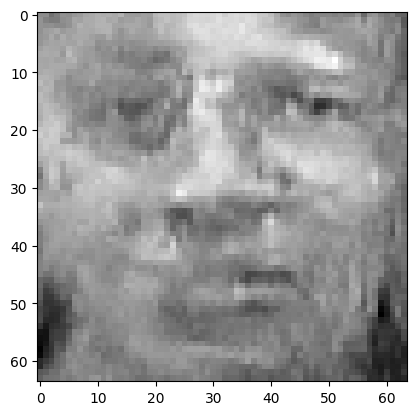

Epoch 162 : 


100%|██████████| 50/50 [00:02<00:00, 20.18it/s]


loss 0.08297666009770134
Epoch 163 : 


100%|██████████| 50/50 [00:02<00:00, 20.51it/s]


loss 0.08821642619559306
Epoch 164 : 


100%|██████████| 50/50 [00:02<00:00, 20.01it/s]


loss 0.08011944627465228
Epoch 165 : 


100%|██████████| 50/50 [00:02<00:00, 19.62it/s]


loss 0.1190333647845097
Epoch 166 : 


100%|██████████| 50/50 [00:02<00:00, 21.83it/s]


loss 0.1064847366876347
Epoch 167 : 


100%|██████████| 50/50 [00:02<00:00, 20.10it/s]


loss 0.08268113583400633
Epoch 168 : 


100%|██████████| 50/50 [00:02<00:00, 21.79it/s]


loss 0.11413778958143767
Epoch 169 : 


100%|██████████| 50/50 [00:02<00:00, 21.15it/s]


loss 0.08192355366728746
Epoch 170 : 


100%|██████████| 50/50 [00:02<00:00, 21.61it/s]


loss 0.07113880890380007
Epoch 171 : 


100%|██████████| 50/50 [00:02<00:00, 23.74it/s]


loss 0.11383887665067814
Epoch 172 : 


100%|██████████| 50/50 [00:02<00:00, 20.76it/s]


loss 0.08526138821346761
Epoch 173 : 


100%|██████████| 50/50 [00:02<00:00, 22.35it/s]


loss 0.09151091679304751
Epoch 174 : 


100%|██████████| 50/50 [00:02<00:00, 20.81it/s]


loss 0.07539540844843926
Epoch 175 : 


100%|██████████| 50/50 [00:02<00:00, 21.27it/s]


loss 0.08279423687405976
Epoch 176 : 


100%|██████████| 50/50 [00:02<00:00, 21.24it/s]


loss 0.07423660480555772
Epoch 177 : 


100%|██████████| 50/50 [00:02<00:00, 20.22it/s]


loss 0.0894190039279123
Epoch 178 : 


100%|██████████| 50/50 [00:02<00:00, 18.76it/s]


loss 0.11584077967656028
Epoch 179 : 


100%|██████████| 50/50 [00:02<00:00, 18.63it/s]


loss 0.11547095887328572
Epoch 180 : 


100%|██████████| 50/50 [00:02<00:00, 19.24it/s]


loss 0.08565612626606552
Epoch 181 : 


100%|██████████| 50/50 [00:02<00:00, 22.82it/s]


loss 0.07368748577953324
torch.Size([3, 1, 64, 64])


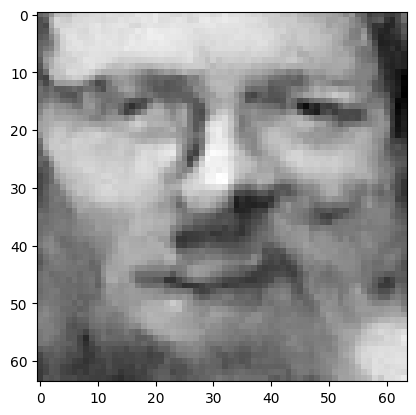

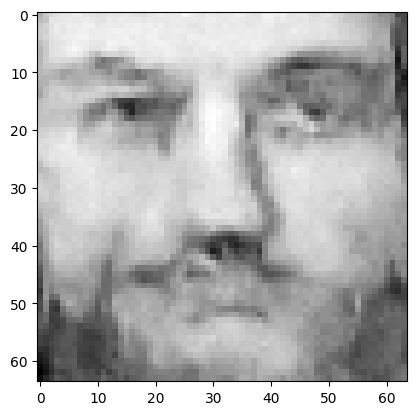

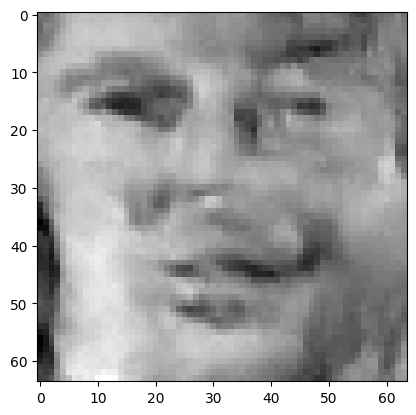

Epoch 182 : 


100%|██████████| 50/50 [00:02<00:00, 20.54it/s]


loss 0.0793372735014471
Epoch 183 : 


100%|██████████| 50/50 [00:02<00:00, 19.07it/s]


loss 0.13421460741947844
Epoch 184 : 


100%|██████████| 50/50 [00:02<00:00, 21.20it/s]


loss 0.10081062592966639
Epoch 185 : 


100%|██████████| 50/50 [00:02<00:00, 20.56it/s]


loss 0.07534902727072564
Epoch 186 : 


100%|██████████| 50/50 [00:02<00:00, 21.03it/s]


loss 0.07790610678400878
Epoch 187 : 


100%|██████████| 50/50 [00:02<00:00, 21.81it/s]


loss 0.06391487418022604
Epoch 188 : 


100%|██████████| 50/50 [00:02<00:00, 24.89it/s]


loss 0.09825991361199109
Epoch 189 : 


100%|██████████| 50/50 [00:02<00:00, 21.35it/s]


loss 0.08214934123339991
Epoch 190 : 


100%|██████████| 50/50 [00:02<00:00, 21.16it/s]


loss 0.08171761906029533
Epoch 191 : 


100%|██████████| 50/50 [00:02<00:00, 20.32it/s]


loss 0.07544973604267842
Epoch 192 : 


100%|██████████| 50/50 [00:02<00:00, 19.77it/s]


loss 0.06501422169230772
Epoch 193 : 


100%|██████████| 50/50 [00:02<00:00, 19.62it/s]


loss 0.08629818969531011
Epoch 194 : 


100%|██████████| 50/50 [00:02<00:00, 23.81it/s]


loss 0.09776971603354763
Epoch 195 : 


100%|██████████| 50/50 [00:02<00:00, 22.78it/s]


loss 0.06690754039037335
Epoch 196 : 


100%|██████████| 50/50 [00:02<00:00, 20.28it/s]


loss 0.07472462962629314
Epoch 197 : 


100%|██████████| 50/50 [00:02<00:00, 18.46it/s]


loss 0.08682922167242552
Epoch 198 : 


100%|██████████| 50/50 [00:02<00:00, 19.43it/s]


loss 0.08089484119804312
Epoch 199 : 


100%|██████████| 50/50 [00:02<00:00, 18.84it/s]


loss 0.09852300570609973


In [10]:
train_ddpm(200, 0.0005, 1, 0.0000)

Epoch 0 : 


100%|██████████| 50/50 [00:02<00:00, 18.62it/s]


loss 0.10081299199345684
Epoch 1 : 


100%|██████████| 50/50 [00:02<00:00, 20.56it/s]


loss 0.07958314139725468
torch.Size([3, 1, 64, 64])


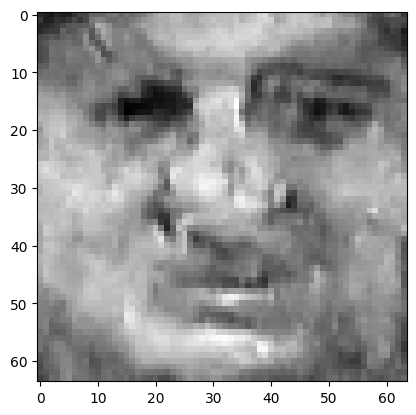

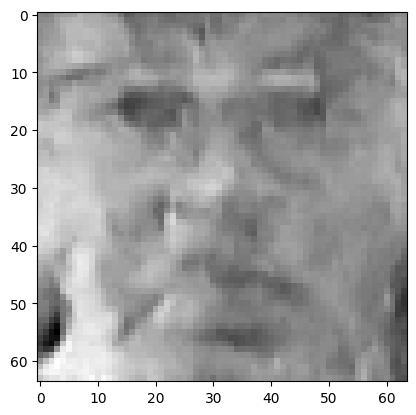

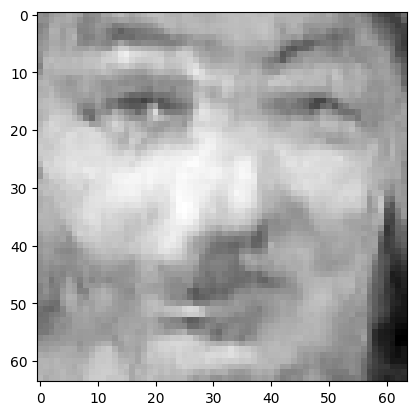

Epoch 2 : 


100%|██████████| 50/50 [00:02<00:00, 20.74it/s]


loss 0.09799771514058937
Epoch 3 : 


100%|██████████| 50/50 [00:02<00:00, 20.42it/s]


loss 0.0694641046810969
Epoch 4 : 


100%|██████████| 50/50 [00:02<00:00, 23.28it/s]


loss 0.08936092601184589
Epoch 5 : 


100%|██████████| 50/50 [00:01<00:00, 25.47it/s]


loss 0.08811620286002435
Epoch 6 : 


100%|██████████| 50/50 [00:02<00:00, 20.71it/s]


loss 0.09130252505687418
Epoch 7 : 


100%|██████████| 50/50 [00:02<00:00, 21.68it/s]


loss 0.13776299984952242
Epoch 8 : 


100%|██████████| 50/50 [00:02<00:00, 21.66it/s]


loss 0.09574211683146439
Epoch 9 : 


100%|██████████| 50/50 [00:02<00:00, 21.33it/s]


loss 0.08673135003756485
Epoch 10 : 


100%|██████████| 50/50 [00:02<00:00, 20.78it/s]


loss 0.09037892449295772
Epoch 11 : 


100%|██████████| 50/50 [00:02<00:00, 20.46it/s]


loss 0.08289989587234678
Epoch 12 : 


100%|██████████| 50/50 [00:02<00:00, 19.88it/s]


loss 0.07454143235609278
Epoch 13 : 


100%|██████████| 50/50 [00:02<00:00, 21.76it/s]


loss 0.10310992813400881
Epoch 14 : 


100%|██████████| 50/50 [00:02<00:00, 19.92it/s]


loss 0.08082974162770086
Epoch 15 : 


100%|██████████| 50/50 [00:02<00:00, 24.06it/s]


loss 0.10810585257519759
Epoch 16 : 


100%|██████████| 50/50 [00:02<00:00, 20.51it/s]


loss 0.08642133271333281
Epoch 17 : 


100%|██████████| 50/50 [00:02<00:00, 20.88it/s]


loss 0.05286915192450496
Epoch 18 : 


100%|██████████| 50/50 [00:02<00:00, 22.26it/s]


loss 0.12823357377488723
Epoch 19 : 


100%|██████████| 50/50 [00:02<00:00, 20.62it/s]


loss 0.10018980812634089
Epoch 20 : 


100%|██████████| 50/50 [00:02<00:00, 19.42it/s]


loss 0.09311300198471731
Epoch 21 : 


100%|██████████| 50/50 [00:02<00:00, 17.71it/s]


loss 0.08236049775519076
torch.Size([3, 1, 64, 64])


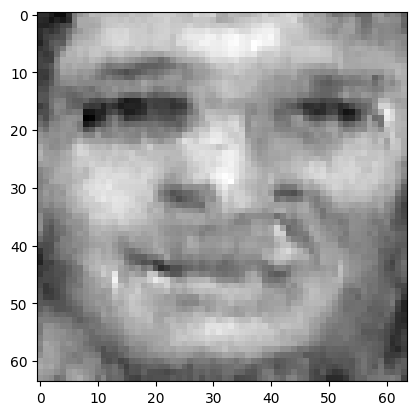

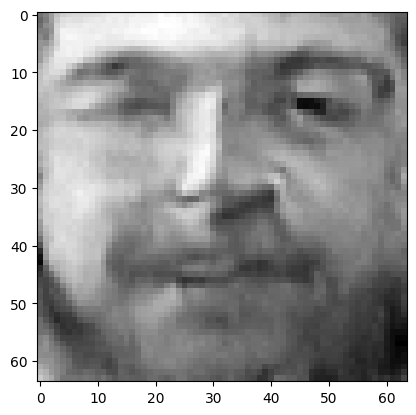

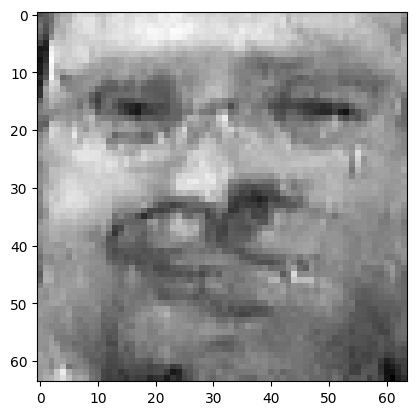

Epoch 22 : 


100%|██████████| 50/50 [00:02<00:00, 19.86it/s]


loss 0.0596633501575938
Epoch 23 : 


100%|██████████| 50/50 [00:02<00:00, 20.16it/s]


loss 0.1260309957503894
Epoch 24 : 


100%|██████████| 50/50 [00:02<00:00, 17.85it/s]


loss 0.0937053773315415
Epoch 25 : 


100%|██████████| 50/50 [00:02<00:00, 17.04it/s]


loss 0.08339581360802552
Epoch 26 : 


100%|██████████| 50/50 [00:02<00:00, 20.57it/s]


loss 0.08559097963251532
Epoch 27 : 


100%|██████████| 50/50 [00:02<00:00, 19.24it/s]


loss 0.07458085333863469
Epoch 28 : 


100%|██████████| 50/50 [00:02<00:00, 21.21it/s]


loss 0.09303477550941512
Epoch 29 : 


100%|██████████| 50/50 [00:02<00:00, 21.27it/s]


loss 0.08479140172267238
Epoch 30 : 


100%|██████████| 50/50 [00:02<00:00, 21.18it/s]


loss 0.08327550468256634
Epoch 31 : 


100%|██████████| 50/50 [00:02<00:00, 23.15it/s]


loss 0.07433301476801173
Epoch 32 : 


100%|██████████| 50/50 [00:02<00:00, 20.22it/s]


loss 0.08848838095470961
Epoch 33 : 


100%|██████████| 50/50 [00:02<00:00, 20.73it/s]


loss 0.0784341455061803
Epoch 34 : 


100%|██████████| 50/50 [00:02<00:00, 22.48it/s]


loss 0.09791560080012719
Epoch 35 : 


100%|██████████| 50/50 [00:02<00:00, 20.39it/s]


loss 0.06152665470140701
Epoch 36 : 


100%|██████████| 50/50 [00:02<00:00, 19.15it/s]


loss 0.07456308495948566
Epoch 37 : 


100%|██████████| 50/50 [00:02<00:00, 20.04it/s]


loss 0.10404387445337601
Epoch 38 : 


100%|██████████| 50/50 [00:02<00:00, 22.14it/s]


loss 0.06472743985714854
Epoch 39 : 


100%|██████████| 50/50 [00:02<00:00, 21.05it/s]


loss 0.0753667674651154
Epoch 40 : 


100%|██████████| 50/50 [00:02<00:00, 21.06it/s]


loss 0.0755329643711388
Epoch 41 : 


100%|██████████| 50/50 [00:02<00:00, 21.76it/s]


loss 0.05715378309647576
torch.Size([3, 1, 64, 64])


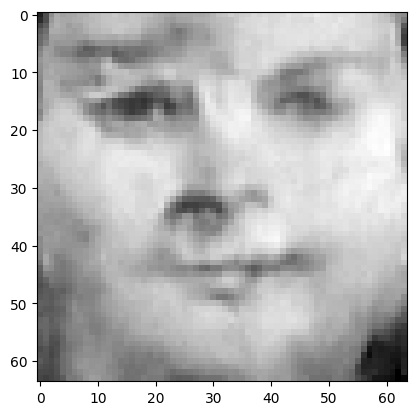

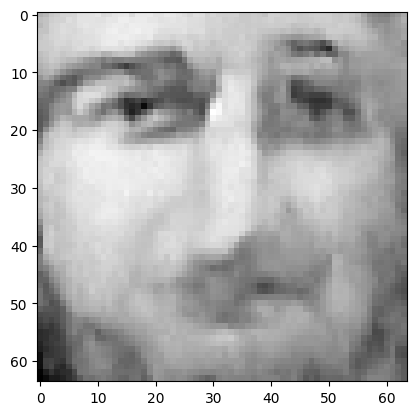

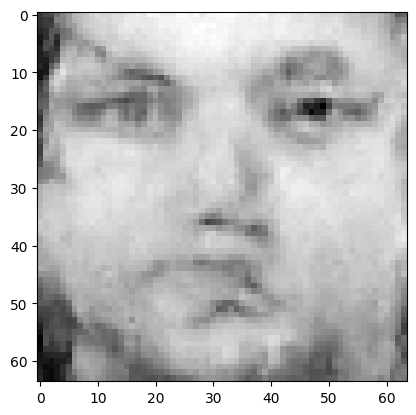

Epoch 42 : 


100%|██████████| 50/50 [00:02<00:00, 17.10it/s]


loss 0.08176667092143647
Epoch 43 : 


100%|██████████| 50/50 [00:02<00:00, 17.34it/s]


loss 0.08360708031502301
Epoch 44 : 


100%|██████████| 50/50 [00:02<00:00, 17.20it/s]


loss 0.06626151991035907
Epoch 45 : 


100%|██████████| 50/50 [00:02<00:00, 17.34it/s]


loss 0.08030779675786547
Epoch 46 : 


100%|██████████| 50/50 [00:02<00:00, 20.08it/s]


loss 0.1334559459405604
Epoch 47 : 


100%|██████████| 50/50 [00:02<00:00, 22.61it/s]


loss 0.07665708054665288
Epoch 48 : 


100%|██████████| 50/50 [00:02<00:00, 19.28it/s]


loss 0.07687034161547464
Epoch 49 : 


100%|██████████| 50/50 [00:02<00:00, 20.70it/s]


loss 0.12537857974322672
Epoch 50 : 


100%|██████████| 50/50 [00:02<00:00, 21.10it/s]


loss 0.06969577203595789
Epoch 51 : 


100%|██████████| 50/50 [00:02<00:00, 18.21it/s]


loss 0.07686699544687992
Epoch 52 : 


100%|██████████| 50/50 [00:02<00:00, 20.83it/s]


loss 0.12743485197676638
Epoch 53 : 


100%|██████████| 50/50 [00:02<00:00, 22.41it/s]


loss 0.08883787656479313
Epoch 54 : 


100%|██████████| 50/50 [00:02<00:00, 20.54it/s]


loss 0.10323385247708387
Epoch 55 : 


100%|██████████| 50/50 [00:02<00:00, 20.69it/s]


loss 0.0898794144054578
Epoch 56 : 


100%|██████████| 50/50 [00:02<00:00, 19.69it/s]


loss 0.11708696078587538
Epoch 57 : 


100%|██████████| 50/50 [00:01<00:00, 26.08it/s]


loss 0.06875973054400777
Epoch 58 : 


100%|██████████| 50/50 [00:02<00:00, 22.62it/s]


loss 0.09327565548650746
Epoch 59 : 


100%|██████████| 50/50 [00:02<00:00, 20.91it/s]


loss 0.0728146889926936
Epoch 60 : 


100%|██████████| 50/50 [00:02<00:00, 20.89it/s]


loss 0.09065300385391954
Epoch 61 : 


100%|██████████| 50/50 [00:02<00:00, 20.81it/s]


loss 0.12591399273608408
torch.Size([3, 1, 64, 64])


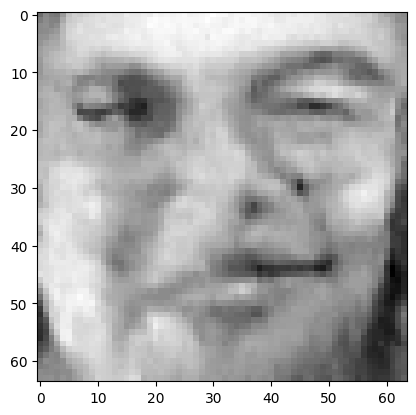

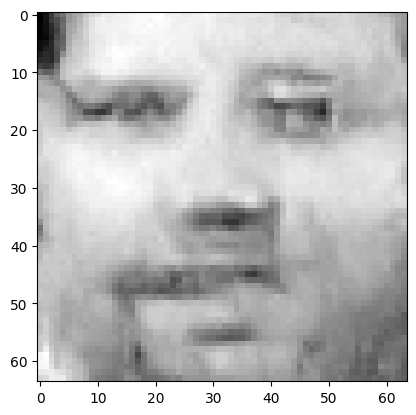

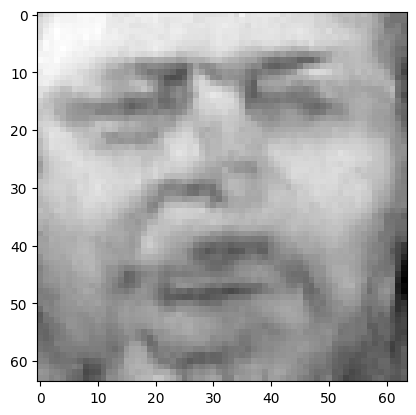

Epoch 62 : 


100%|██████████| 50/50 [00:02<00:00, 20.30it/s]


loss 0.09121440433727634
Epoch 63 : 


100%|██████████| 50/50 [00:02<00:00, 22.66it/s]


loss 0.08400382513897954
Epoch 64 : 


100%|██████████| 50/50 [00:02<00:00, 22.35it/s]


loss 0.08917931104840214
Epoch 65 : 


100%|██████████| 50/50 [00:02<00:00, 21.98it/s]


loss 0.06823531829628064
Epoch 66 : 


100%|██████████| 50/50 [00:02<00:00, 20.55it/s]


loss 0.12943609659737806
Epoch 67 : 


100%|██████████| 50/50 [00:02<00:00, 21.95it/s]


loss 0.10062240701828878
Epoch 68 : 


100%|██████████| 50/50 [00:02<00:00, 20.28it/s]


loss 0.09190332403461944
Epoch 69 : 


100%|██████████| 50/50 [00:02<00:00, 21.53it/s]


loss 0.0881567728955066
Epoch 70 : 


100%|██████████| 50/50 [00:02<00:00, 20.60it/s]


loss 0.08201330412110713
Epoch 71 : 


100%|██████████| 50/50 [00:02<00:00, 19.54it/s]


loss 0.06293334569109377
Epoch 72 : 


100%|██████████| 50/50 [00:02<00:00, 21.31it/s]


loss 0.06289613796125738
Epoch 73 : 


100%|██████████| 50/50 [00:02<00:00, 19.37it/s]


loss 0.07697775067694436
Epoch 74 : 


100%|██████████| 50/50 [00:02<00:00, 19.61it/s]


loss 0.09005197703399782
Epoch 75 : 


100%|██████████| 50/50 [00:02<00:00, 20.31it/s]


loss 0.07512245358239243
Epoch 76 : 


100%|██████████| 50/50 [00:02<00:00, 17.68it/s]


loss 0.05811583594158922
Epoch 77 : 


100%|██████████| 50/50 [00:02<00:00, 18.64it/s]


loss 0.08872903617707462
Epoch 78 : 


100%|██████████| 50/50 [00:02<00:00, 18.37it/s]


loss 0.11333499152475571
Epoch 79 : 


100%|██████████| 50/50 [00:02<00:00, 19.12it/s]


loss 0.07651192453518255
Epoch 80 : 


100%|██████████| 50/50 [00:02<00:00, 21.40it/s]


loss 0.08582180357911383
Epoch 81 : 


100%|██████████| 50/50 [00:02<00:00, 20.53it/s]


loss 0.08271031868654555
torch.Size([3, 1, 64, 64])


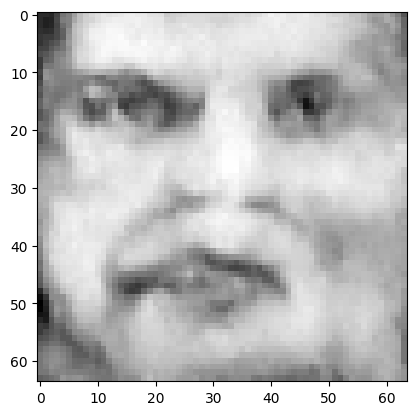

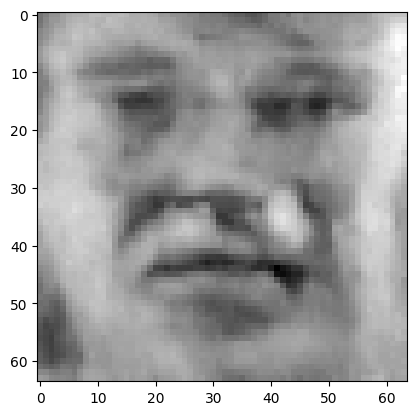

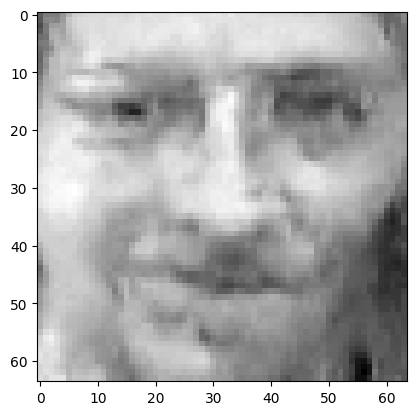

Epoch 82 : 


100%|██████████| 50/50 [00:02<00:00, 20.99it/s]


loss 0.12650543619501667
Epoch 83 : 


100%|██████████| 50/50 [00:02<00:00, 22.19it/s]


loss 0.06654504578390939
Epoch 84 : 


100%|██████████| 50/50 [00:02<00:00, 20.12it/s]


loss 0.10418484105469836
Epoch 85 : 


100%|██████████| 50/50 [00:02<00:00, 20.80it/s]


loss 0.07700216176937666
Epoch 86 : 


100%|██████████| 50/50 [00:02<00:00, 19.76it/s]


loss 0.08501239346304927
Epoch 87 : 


100%|██████████| 50/50 [00:02<00:00, 23.89it/s]


loss 0.07241658408431785
Epoch 88 : 


100%|██████████| 50/50 [00:02<00:00, 20.50it/s]


loss 0.11284737264003941
Epoch 89 : 


100%|██████████| 50/50 [00:02<00:00, 21.11it/s]


loss 0.09215982814183266
Epoch 90 : 


100%|██████████| 50/50 [00:02<00:00, 20.22it/s]


loss 0.066972541368412
Epoch 91 : 


100%|██████████| 50/50 [00:02<00:00, 21.71it/s]


loss 0.0777951232759738
Epoch 92 : 


100%|██████████| 50/50 [00:02<00:00, 21.34it/s]


loss 0.08691476833061629
Epoch 93 : 


100%|██████████| 50/50 [00:02<00:00, 19.49it/s]


loss 0.10142363777649306
Epoch 94 : 


100%|██████████| 50/50 [00:02<00:00, 21.34it/s]


loss 0.1423312929120102
Epoch 95 : 


100%|██████████| 50/50 [00:02<00:00, 19.16it/s]


loss 0.09838139069734242
Epoch 96 : 


100%|██████████| 50/50 [00:02<00:00, 17.70it/s]


loss 0.06525991173288571
Epoch 97 : 


100%|██████████| 50/50 [00:03<00:00, 16.58it/s]


loss 0.11844054282865413
Epoch 98 : 


100%|██████████| 50/50 [00:02<00:00, 18.47it/s]


loss 0.08958509904798861
Epoch 99 : 


100%|██████████| 50/50 [00:02<00:00, 21.32it/s]


loss 0.0680758257550308
Epoch 100 : 


100%|██████████| 50/50 [00:02<00:00, 24.76it/s]


loss 0.11467802204720215
Epoch 101 : 


100%|██████████| 50/50 [00:02<00:00, 23.86it/s]


loss 0.06450807439001573
torch.Size([3, 1, 64, 64])


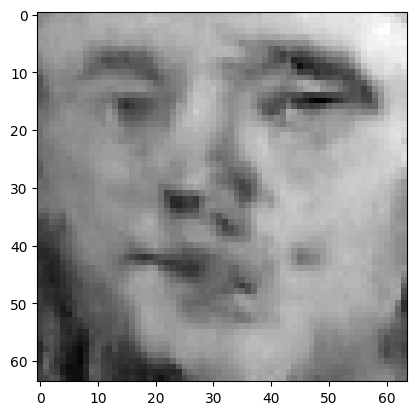

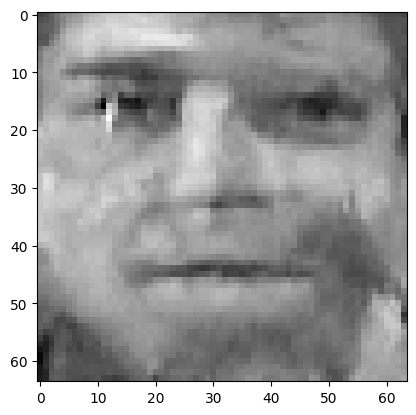

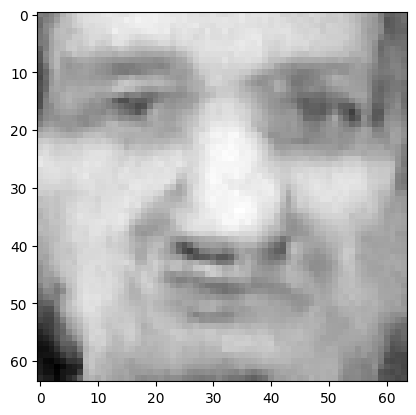

Epoch 102 : 


100%|██████████| 50/50 [00:02<00:00, 20.16it/s]


loss 0.07070278708291942
Epoch 103 : 


100%|██████████| 50/50 [00:02<00:00, 20.59it/s]


loss 0.08325044913988605
Epoch 104 : 


100%|██████████| 50/50 [00:02<00:00, 20.02it/s]


loss 0.06904662338823885
Epoch 105 : 


100%|██████████| 50/50 [00:02<00:00, 20.20it/s]


loss 0.08087088582248105
Epoch 106 : 


100%|██████████| 50/50 [00:02<00:00, 20.15it/s]


loss 0.05780145627785446
Epoch 107 : 


100%|██████████| 50/50 [00:02<00:00, 21.83it/s]


loss 0.07447358483771575
Epoch 108 : 


100%|██████████| 50/50 [00:02<00:00, 23.05it/s]


loss 0.09620924801540481
Epoch 109 : 


100%|██████████| 50/50 [00:02<00:00, 21.09it/s]


loss 0.07389095709116662
Epoch 110 : 


100%|██████████| 50/50 [00:02<00:00, 21.86it/s]


loss 0.0866771570904079
Epoch 111 : 


100%|██████████| 50/50 [00:02<00:00, 21.97it/s]


loss 0.11652577001425676
Epoch 112 : 


100%|██████████| 50/50 [00:02<00:00, 21.12it/s]


loss 0.0738208546178571
Epoch 113 : 


100%|██████████| 50/50 [00:02<00:00, 20.23it/s]


loss 0.09592641017704354
Epoch 114 : 


100%|██████████| 50/50 [00:02<00:00, 18.63it/s]


loss 0.0754712076778244
Epoch 115 : 


100%|██████████| 50/50 [00:02<00:00, 20.04it/s]


loss 0.0817953031004957
Epoch 116 : 


100%|██████████| 50/50 [00:02<00:00, 20.15it/s]


loss 0.09931674047395948
Epoch 117 : 


100%|██████████| 50/50 [00:02<00:00, 20.70it/s]


loss 0.1289607812596047
Epoch 118 : 


100%|██████████| 50/50 [00:02<00:00, 22.14it/s]


loss 0.08467622540563251
Epoch 119 : 


100%|██████████| 50/50 [00:02<00:00, 20.28it/s]


loss 0.08052749147269318
Epoch 120 : 


100%|██████████| 50/50 [00:02<00:00, 20.77it/s]


loss 0.11844173318213777
Epoch 121 : 


100%|██████████| 50/50 [00:02<00:00, 21.02it/s]


loss 0.11049408799322855
torch.Size([3, 1, 64, 64])


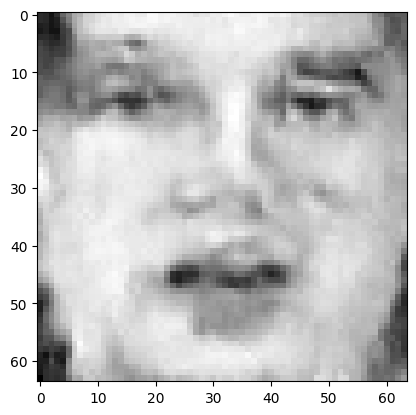

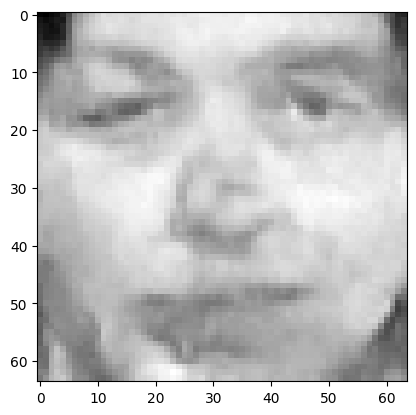

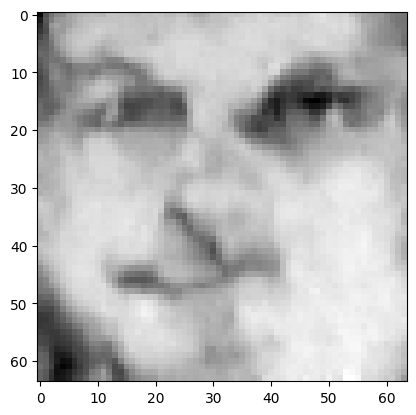

Epoch 122 : 


100%|██████████| 50/50 [00:02<00:00, 22.61it/s]


loss 0.0835074049826822
Epoch 123 : 


100%|██████████| 50/50 [00:02<00:00, 21.82it/s]


loss 0.07786898149281535
Epoch 124 : 


100%|██████████| 50/50 [00:02<00:00, 22.64it/s]


loss 0.060619428983078774
Epoch 125 : 


100%|██████████| 50/50 [00:02<00:00, 20.06it/s]


loss 0.07041733373190205
Epoch 126 : 


100%|██████████| 50/50 [00:02<00:00, 20.37it/s]


loss 0.07539651649776058
Epoch 127 : 


100%|██████████| 50/50 [00:02<00:00, 20.67it/s]


loss 0.08999010577634
Epoch 128 : 


100%|██████████| 50/50 [00:02<00:00, 20.89it/s]


loss 0.08174972182092904
Epoch 129 : 


100%|██████████| 50/50 [00:02<00:00, 19.98it/s]


loss 0.07509175938026967
Epoch 130 : 


100%|██████████| 50/50 [00:02<00:00, 18.90it/s]


loss 0.08825194860791807
Epoch 131 : 


100%|██████████| 50/50 [00:02<00:00, 20.95it/s]


loss 0.07554444250706807
Epoch 132 : 


100%|██████████| 50/50 [00:02<00:00, 21.28it/s]


loss 0.07070490413772856
Epoch 133 : 


100%|██████████| 50/50 [00:02<00:00, 21.73it/s]


loss 0.08124641257102055
Epoch 134 : 


100%|██████████| 50/50 [00:02<00:00, 21.52it/s]


loss 0.10920522940567604
Epoch 135 : 


100%|██████████| 50/50 [00:02<00:00, 20.66it/s]


loss 0.08006980814872418
Epoch 136 : 


100%|██████████| 50/50 [00:02<00:00, 23.26it/s]


loss 0.09226003190522836
Epoch 137 : 


100%|██████████| 50/50 [00:02<00:00, 22.74it/s]


loss 0.0928922725576071
Epoch 138 : 


100%|██████████| 50/50 [00:02<00:00, 21.50it/s]


loss 0.08682434306590073
Epoch 139 : 


100%|██████████| 50/50 [00:02<00:00, 20.56it/s]


loss 0.10354936685626322
Epoch 140 : 


100%|██████████| 50/50 [00:02<00:00, 20.77it/s]


loss 0.09255083744786571
Epoch 141 : 


100%|██████████| 50/50 [00:02<00:00, 20.38it/s]


loss 0.07679179735475412
torch.Size([3, 1, 64, 64])


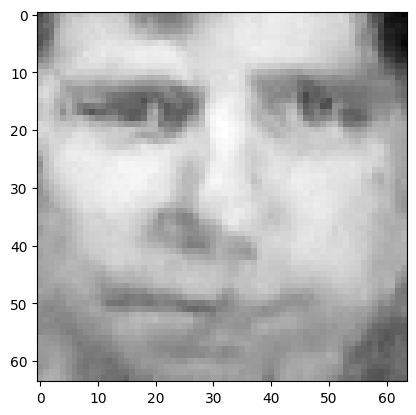

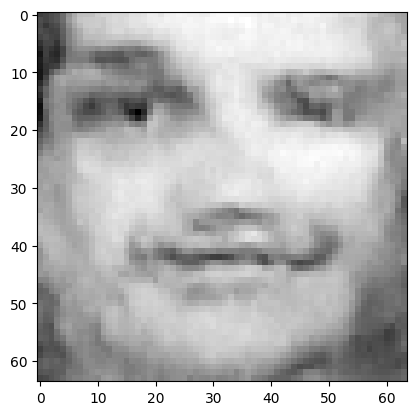

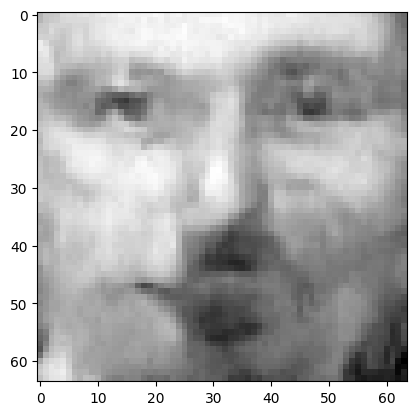

Epoch 142 : 


100%|██████████| 50/50 [00:02<00:00, 20.39it/s]


loss 0.09123350252568536
Epoch 143 : 


100%|██████████| 50/50 [00:02<00:00, 20.56it/s]


loss 0.06945413177658515
Epoch 144 : 


100%|██████████| 50/50 [00:02<00:00, 20.94it/s]


loss 0.09934617446863701
Epoch 145 : 


100%|██████████| 50/50 [00:02<00:00, 21.06it/s]


loss 0.06760360256014057
Epoch 146 : 


100%|██████████| 50/50 [00:02<00:00, 21.23it/s]


loss 0.07355964964138892
Epoch 147 : 


100%|██████████| 50/50 [00:02<00:00, 20.93it/s]


loss 0.10192858832980518
Epoch 148 : 


100%|██████████| 50/50 [00:02<00:00, 24.71it/s]


loss 0.08030965870958591
Epoch 149 : 


100%|██████████| 50/50 [00:02<00:00, 19.94it/s]


loss 0.06992440546989502
Epoch 150 : 


100%|██████████| 50/50 [00:02<00:00, 19.42it/s]


loss 0.1087715622252805
Epoch 151 : 


100%|██████████| 50/50 [00:02<00:00, 19.46it/s]


loss 0.09040923262649393
Epoch 152 : 


100%|██████████| 50/50 [00:02<00:00, 19.18it/s]


loss 0.09758684907874648
Epoch 153 : 


100%|██████████| 50/50 [00:02<00:00, 17.77it/s]


loss 0.06651606111100618
Epoch 154 : 


100%|██████████| 50/50 [00:02<00:00, 18.38it/s]


loss 0.07121689344074647
Epoch 155 : 


100%|██████████| 50/50 [00:02<00:00, 18.30it/s]


loss 0.08244183719954963
Epoch 156 : 


100%|██████████| 50/50 [00:02<00:00, 21.27it/s]


loss 0.08048680900471415
Epoch 157 : 


100%|██████████| 50/50 [00:02<00:00, 20.41it/s]


loss 0.08475716037490176
Epoch 158 : 


100%|██████████| 50/50 [00:02<00:00, 19.83it/s]


loss 0.0901241241776993
Epoch 159 : 


100%|██████████| 50/50 [00:02<00:00, 17.39it/s]


loss 0.08076407115462857
Epoch 160 : 


100%|██████████| 50/50 [00:02<00:00, 19.34it/s]


loss 0.1151942571566962
Epoch 161 : 


100%|██████████| 50/50 [00:01<00:00, 25.38it/s]


loss 0.10509708124045902
torch.Size([3, 1, 64, 64])


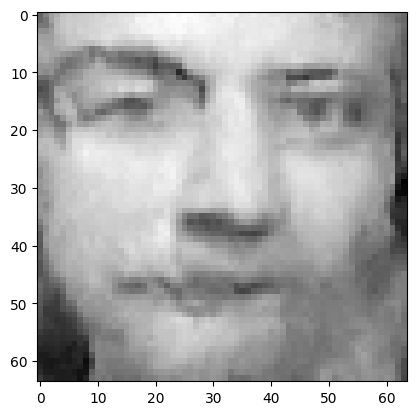

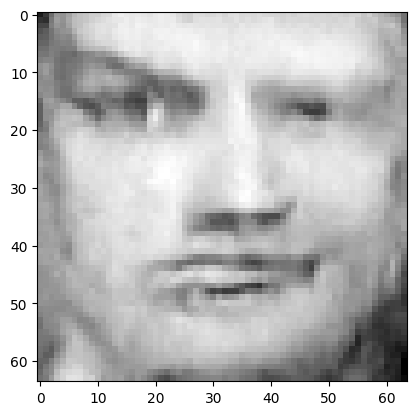

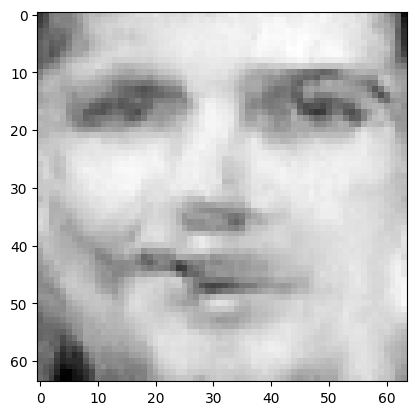

Epoch 162 : 


100%|██████████| 50/50 [00:02<00:00, 19.73it/s]


loss 0.09921269541913184
Epoch 163 : 


100%|██████████| 50/50 [00:02<00:00, 19.84it/s]


loss 0.10869066858969822
Epoch 164 : 


100%|██████████| 50/50 [00:02<00:00, 19.80it/s]


loss 0.08199763319222357
Epoch 165 : 


100%|██████████| 50/50 [00:02<00:00, 21.02it/s]


loss 0.07370999714705594
Epoch 166 : 


100%|██████████| 50/50 [00:02<00:00, 20.32it/s]


loss 0.1058246086321815
Epoch 167 : 


100%|██████████| 50/50 [00:02<00:00, 19.80it/s]


loss 0.09126562914656723
Epoch 168 : 


100%|██████████| 50/50 [00:02<00:00, 21.91it/s]


loss 0.07638716052739258
Epoch 169 : 


100%|██████████| 50/50 [00:02<00:00, 20.62it/s]


loss 0.0936518179730898
Epoch 170 : 


100%|██████████| 50/50 [00:02<00:00, 21.70it/s]


loss 0.10479136609927442
Epoch 171 : 


100%|██████████| 50/50 [00:02<00:00, 23.49it/s]


loss 0.08110748716006555
Epoch 172 : 


100%|██████████| 50/50 [00:02<00:00, 18.23it/s]


loss 0.06246442589058148
Epoch 173 : 


100%|██████████| 50/50 [00:02<00:00, 19.11it/s]


loss 0.08739239403843026
Epoch 174 : 


100%|██████████| 50/50 [00:02<00:00, 18.35it/s]


loss 0.07477606688389891
Epoch 175 : 


100%|██████████| 50/50 [00:02<00:00, 17.48it/s]


loss 0.07011922321674154
Epoch 176 : 


100%|██████████| 50/50 [00:02<00:00, 18.38it/s]


loss 0.0840096244162356
Epoch 177 : 


100%|██████████| 50/50 [00:02<00:00, 21.72it/s]


loss 0.07402563063118402
Epoch 178 : 


100%|██████████| 50/50 [00:02<00:00, 19.37it/s]


loss 0.07615859126078803
Epoch 179 : 


100%|██████████| 50/50 [00:02<00:00, 18.91it/s]


loss 0.08516548983735815
Epoch 180 : 


100%|██████████| 50/50 [00:02<00:00, 21.51it/s]


loss 0.06904637270730536
Epoch 181 : 


100%|██████████| 50/50 [00:02<00:00, 22.34it/s]


loss 0.06523763888689073
torch.Size([3, 1, 64, 64])


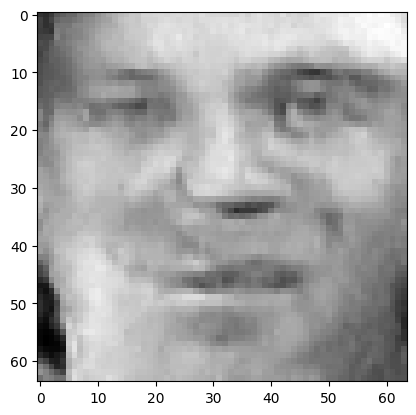

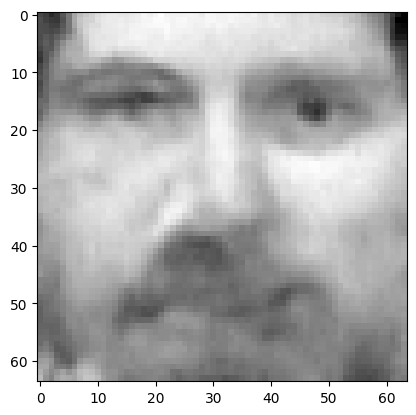

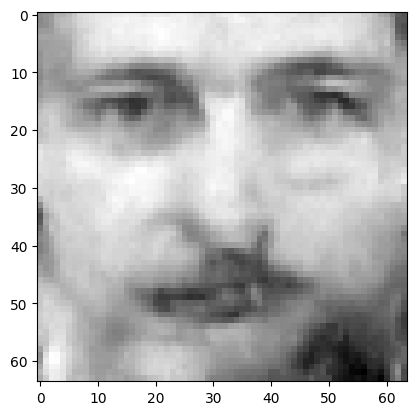

Epoch 182 : 


100%|██████████| 50/50 [00:02<00:00, 21.42it/s]


loss 0.10000699620474746
Epoch 183 : 


100%|██████████| 50/50 [00:02<00:00, 21.70it/s]


loss 0.06184398033775827
Epoch 184 : 


100%|██████████| 50/50 [00:02<00:00, 20.16it/s]


loss 0.08946405114371321
Epoch 185 : 


100%|██████████| 50/50 [00:02<00:00, 20.59it/s]


loss 0.08746272657754826
Epoch 186 : 


100%|██████████| 50/50 [00:02<00:00, 20.85it/s]


loss 0.0778273594988975
Epoch 187 : 


100%|██████████| 50/50 [00:02<00:00, 20.87it/s]


loss 0.10900282352337086
Epoch 188 : 


100%|██████████| 50/50 [00:02<00:00, 19.44it/s]


loss 0.1022603499359178
Epoch 189 : 


100%|██████████| 50/50 [00:02<00:00, 20.23it/s]


loss 0.10255133994745656
Epoch 190 : 


100%|██████████| 50/50 [00:02<00:00, 19.50it/s]


loss 0.09008264163747234
Epoch 191 : 


100%|██████████| 50/50 [00:02<00:00, 20.84it/s]


loss 0.11278326657558672
Epoch 192 : 


100%|██████████| 50/50 [00:02<00:00, 20.86it/s]


loss 0.09330226789735131
Epoch 193 : 


100%|██████████| 50/50 [00:02<00:00, 21.83it/s]


loss 0.10655219265705387
Epoch 194 : 


100%|██████████| 50/50 [00:02<00:00, 24.44it/s]


loss 0.09424559234783456
Epoch 195 : 


100%|██████████| 50/50 [00:02<00:00, 19.82it/s]


loss 0.092207919009003
Epoch 196 : 


100%|██████████| 50/50 [00:02<00:00, 21.06it/s]


loss 0.11032380999305205
Epoch 197 : 


100%|██████████| 50/50 [00:02<00:00, 19.85it/s]


loss 0.08056442649013042
Epoch 198 : 


100%|██████████| 50/50 [00:02<00:00, 19.76it/s]


loss 0.07617435916597905
Epoch 199 : 


100%|██████████| 50/50 [00:02<00:00, 20.25it/s]


loss 0.07983501737170558


In [11]:
train_ddpm(200, 0.0005, 0.99, 0.0000)

In [14]:
cpu = torch.device('cpu')
ddpm.to(cpu)
torch.save(ddpm.state_dict(), f"./ddpm_batched_600_last20.pth")

# Evaluation

In [12]:
ddpm.load_state_dict(torch.load("ddpm_batched_600_last20.pth"))

<All keys matched successfully>

In [18]:
torch.random.manual_seed(0)
x_i = torch.randn(1, 1, 64, 64).to(device)

In [20]:
result = []
with torch.no_grad():
    result.append(ddpm.sample(1, (1, 64, 64), device, x_i))
    result.append(ddpm.sample(1, (1, 64, 64), device, x_i))
    result.append(ddpm.sample(1, (1, 64, 64), device, x_i))

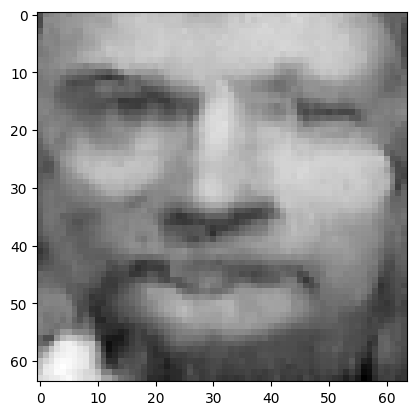

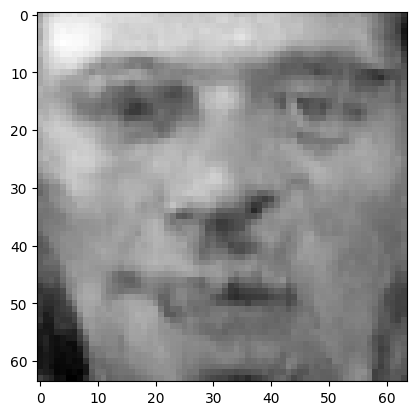

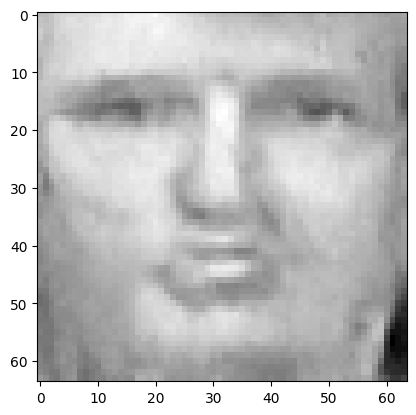

In [23]:
for i in range(3):
    tensor_to_picture(result[i].detach().cpu().numpy()[0][0])

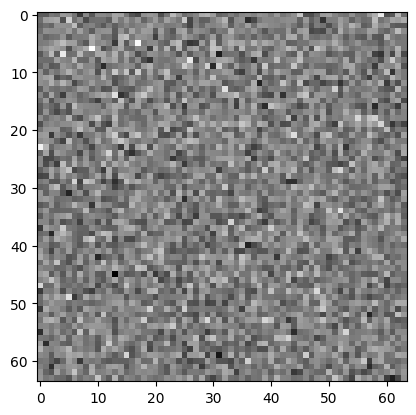

In [24]:
tensor_to_picture(x_i.detach().cpu().numpy()[0][0])